
#####Libraries


In [ ]:
import sklearn
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 6.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
# pip install TA-lib
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz

!tar -xzf ta-lib-0.4.0-src.tar.gz
%cd ta-lib/
!./configure --prefix=$HOME
!make
!make install

!TA_LIBRARY_PATH=~/lib TA_INCLUDE_PATH=~/include pip install ta-lib

--2022-09-15 07:59:23--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-09-15 07:59:24--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-09-15 07:59:24--  http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cfhcable.dl.s

In [ ]:
import talib as ta
import matplotlib.pyplot as plt

##### Load Dataset


In [ ]:
#φτιάχνω τη λίστα με τα assets μου -> 50 μετοχές 
#διόρθωση : θα βγάλω τυχαία άλλες 4 μετοχές μαζί με την OGN επειδή δεν έχει το ίδιο μέγεθος με τις άλλες 
#βγάζω OGN ,WRK,HST,CE,ACN
assets= ["ABBV","AEP","AIZ","ALLE","AMAT","AMP","AMZN","AVB","AVY",   
  "AXP","BDX","BF-B","BMY","BR","CARR","CDW","CHTR","CNC",   
  "CNP","COP","CTAS","CZR","DG","DPZ","DRE","DXC","META","FTV",   
  "GOOG","GPC","HIG","JPM","KR","PG","PPL","PRU",   
  "PYPL","RE","ROL","ROST","UNH","URI","V","VRSK","XOM"]
#άρα πρέπει να κατεβάσουμε όλα τα adj close για όλες τις τιμές όλων των μετοχών και να κάνουμε απόλυτο ranking και σε 5 κλασεις (targets)
#αλλαγή σε παραπάνω μήνες (+3)
r=pd.DataFrame(index=pdr.get_data_yahoo(assets[0],'2021-01-01','2022-07-01')['Adj Close'].index)
#παίρνω τιμές για ένα χρόνο 
for i in assets:
  # print('i metoxi me onoma:',i,'exei megethos',pdr.get_data_yahoo(i,'2021-01-01','2022-04-01')['Adj Close'].count())
  temp= pdr.get_data_yahoo(i,'2021-01-01','2022-07-01')['Adj Close']
  temp=temp.dropna()
  r[i]=temp.values
#φτιάχνω ένα αντίγραφο με τις τιμές για να το έχω 
rd=pd.DataFrame(r)
#proetoimazw ranks tis imeras 
rd1= rd.pct_change()
rd1

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.010341,-0.001349,0.000303,0.001922,0.031426,-0.005848,0.010004,-0.002893,0.002172,0.005337,...,0.009686,0.012892,-0.008242,0.016475,0.000854,-0.013448,0.025778,-0.014925,-0.004486,0.048193
2021-01-06,-0.008639,0.007982,0.043889,0.022755,0.013728,0.057377,-0.024897,0.026826,0.038232,0.036993,...,0.059243,-0.034396,0.059276,0.016465,0.043697,0.041966,0.089060,-0.008811,-0.009457,0.025517
2021-01-07,0.010703,-0.026681,0.010076,0.026340,0.041066,0.012086,0.007577,-0.013628,0.031193,-0.007910,...,-0.004406,0.036194,0.007177,0.016705,-0.002208,0.016033,0.031690,0.005597,0.004549,0.007846
2021-01-08,0.005248,-0.008887,-0.005239,-0.003488,0.010575,0.007096,0.006496,0.008787,-0.038226,0.000986,...,-0.007990,0.031569,-0.009902,0.015683,0.003196,-0.004493,-0.017115,0.007670,-0.000348,0.011121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24,0.019338,0.012877,0.020968,0.028819,0.043739,0.040616,0.035752,-0.006820,0.063412,0.031768,...,0.053195,0.052432,0.040260,0.028111,0.047986,-0.008343,0.052790,0.045108,0.011815,0.019833
2022-06-27,0.005251,0.014744,0.000868,-0.003614,0.002568,-0.008263,-0.027821,0.018550,0.009676,-0.012727,...,-0.004722,-0.022400,-0.000565,0.004842,-0.015349,0.020216,0.014902,-0.009489,0.006416,0.024511
2022-06-28,-0.004244,0.001053,-0.000058,-0.008464,-0.026534,-0.014036,-0.051404,-0.008603,-0.016951,-0.014554,...,0.007530,-0.054253,-0.009186,-0.021825,-0.046633,0.005498,-0.015874,-0.026724,-0.029638,0.027743


In [ ]:
#prepare the ranks for next month (22 working days later)
rd1_next_month = rd1.shift(-22)
rd1_next_month

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,0.014773,0.011442,-0.010281,0.003949,0.033744,0.036907,0.005576,0.024197,0.020131,0.037031,...,0.022480,0.073561,0.031034,0.015570,0.009007,-0.025363,0.036005,0.039184,0.008134,0.019190
2021-01-05,0.001843,-0.000243,0.018805,0.017163,-0.024506,0.008361,0.006349,0.002153,0.019616,0.011049,...,-0.031650,-0.003661,-0.006925,0.009951,-0.000253,-0.014606,0.022707,-0.002294,-0.005096,0.033520
2021-01-06,-0.017383,-0.014722,0.008038,0.028473,0.054414,0.010660,-0.008714,0.006445,0.010399,0.013541,...,0.009356,0.047246,0.026390,-0.008522,0.016341,-0.000524,0.024461,-0.009005,0.007630,0.043043
2021-01-07,-0.013478,-0.004985,0.005095,-0.002649,-0.007628,0.006329,-0.005399,0.002885,-0.013437,-0.010235,...,0.006427,0.007194,0.034859,0.020727,-0.005055,0.016310,0.018550,-0.001788,0.008737,-0.011712
2021-01-08,-0.012808,0.002129,-0.056563,0.010195,0.004745,0.001817,-0.005573,0.011621,0.012113,0.012236,...,0.008351,-0.003589,0.007080,0.000264,0.001916,0.011437,-0.001623,-0.000387,0.001627,0.009678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
rd2=rd1_next_month.rank(axis=1,method='first')
rd2=rd2.dropna()
rd2.astype(int)
jk=rd2.copy()
jk.astype(int)

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,24,22,4,15,38,41,18,34,30,42,...,32,45,36,25,21,1,40,43,19,28
2021-01-05,21,20,38,36,3,29,25,22,39,32,...,1,12,10,31,19,5,42,14,11,43
2021-01-06,3,5,26,41,45,30,9,23,29,32,...,28,43,40,10,35,18,39,8,25,42
2021-01-07,3,13,26,17,10,27,11,24,4,7,...,28,30,44,41,12,39,40,18,34,5
2021-01-08,4,23,1,37,27,21,7,39,40,41,...,33,10,31,17,22,38,13,16,20,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-23,13,6,15,20,33,31,28,3,43,23,...,41,39,30,19,36,1,40,34,5,14
2022-05-24,30,39,20,17,23,10,1,41,36,6,...,14,2,19,27,5,43,40,8,32,45
2022-05-25,36,40,39,31,11,23,3,30,17,22,...,43,1,29,15,4,42,20,10,9,44


In [ ]:
def rank_data(df1):
  for i in range(len(df1.index)):
    d=df1.loc[df1.index[i]]  #της κάθε μέρας d[1] δίνει μόνο τις τιμές 
    #print(d)
    d=d.sort_values()
    d[0:9]=1
    d[9:18]=2
    d[18:27]=3
    d[27:36]=4
    d[36:45]=5
    df1.loc[df1.index[i]]=d
    #print(df1.loc[df1.index[i]])
    #print(d)
  df1=df1.astype(int)
  return df1
r5=rd2.copy()
rd3=rank_data(r5)
rd3

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,3,3,1,2,5,5,2,4,4,5,...,4,5,4,3,3,1,5,5,3,4
2021-01-05,3,3,5,4,1,4,3,3,5,4,...,1,2,2,4,3,1,5,2,2,5
2021-01-06,1,1,3,5,5,4,1,3,4,4,...,4,5,5,2,4,2,5,1,3,5
2021-01-07,1,2,3,2,2,3,2,3,1,1,...,4,4,5,5,2,5,5,2,4,1
2021-01-08,1,3,1,5,3,3,1,5,5,5,...,4,2,4,2,3,5,2,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-23,2,1,2,3,4,4,4,1,5,3,...,5,5,4,3,4,1,5,4,1,2
2022-05-24,4,5,3,2,3,2,1,5,4,1,...,2,1,3,3,1,5,5,1,4,5
2022-05-25,4,5,5,4,2,3,1,4,2,3,...,5,1,4,2,1,5,3,2,1,5


In [ ]:
#for absolute rank feature to use 
rd2_feature=rd1.rank(axis=1,method='first')
rd2_feature=rd2_feature.dropna()
rd2_feature.astype(int)
jk_feature=rd2_feature.copy()
jk_feature.astype(int)

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,34,14,15,21,41,9,33,12,22,25,...,32,36,6,38,17,5,40,3,11,44
2021-01-06,8,14,37,25,20,40,3,28,31,29,...,41,1,42,21,36,35,44,7,6,26
2021-01-07,25,2,23,36,44,28,20,3,40,8,...,9,43,19,30,11,29,41,18,16,21
2021-01-08,28,8,13,17,37,31,30,34,1,22,...,11,45,6,42,26,14,3,33,19,38
2021-01-11,39,23,22,29,42,26,5,20,43,21,...,27,7,16,28,10,15,13,11,9,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24,13,6,15,20,33,31,28,3,43,23,...,41,39,30,19,36,1,40,34,5,14
2022-06-27,30,39,20,17,23,10,1,41,36,6,...,14,2,19,27,5,43,40,8,32,45
2022-06-28,36,40,39,31,11,23,3,30,17,22,...,43,1,29,15,4,42,20,10,9,44


#####Features 
All of them 
***

In [ ]:
stock=dict()
for i in assets:
  #παίρνω δεδομένα για 15 μήνες περιπου->από Ιανουάριο 2021 μέχρι Iούνιο 2022 (3 μήνες παραπάνω δεδομένα για να τα χρησιμοποιήσουμε για τα target values)->προβλεψη τον επομενο μηνα
  stock[i]=pdr.get_data_yahoo(i,'2021-01-01','2022-07-01') 
  # print(df)
  #από αυτές κρατάμε μόνο τις πρώτες 5 στήλες 
  stock[i]=stock[i].iloc[:,:5]
stock

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

{'ABBV':                   Open        High         Low       Close   Adj Close
 Date                                                                  
 2021-01-04  107.180000  107.349998  103.860001  105.410004   97.798584
 2021-01-05  105.410004  107.019997  104.629997  106.500000   98.809898
 2021-01-06  104.750000  107.190002  104.180000  105.580002   97.956322
 2021-01-07  106.110001  107.059998  105.570000  106.709999   99.004715
 2021-01-08  106.839996  107.529999  105.760002  107.269997   99.524277
 ...                ...         ...         ...         ...         ...
 2022-06-24  150.889999  152.740005  149.619995  152.339996  150.928238
 2022-06-27  153.000000  155.449997  152.750000  153.139999  151.720825
 2022-06-28  153.169998  155.119995  151.389999  152.490005  151.076859
 2022-06-29  153.899994  156.619995  153.350006  154.139999  152.711563
 2022-06-30  153.169998  154.039993  150.869995  153.160004  151.740646
 
 [376 rows x 5 columns],
 'AEP':                  Open

In [ ]:
for j in assets:
    df=stock[j] #all the days we need so we can fix the columns 
    # print('to df ftanei mexri ',stock[j].iloc[:-61].tail(1))
    # print(df)
    #τώρα θα προσθέσουμε τις καινούριες στήλες με τα features μας 
    df['(open2-open1)/open2']= (df['Open'].shift(2)-df['Open'].shift(1))/df['Open'].shift(2)
    df['(high2-high1)/high2']= (df['High'].shift(2)-df['High'].shift(1))/df['High'].shift(2)
    df['(low2-low1)/low2']= (df['Low'].shift(2)-df['Low'].shift(1))/df['Low'].shift(2)
    df['(Adj Close2-Adj Close1)/Adj Close2']=(df['Adj Close'].shift(2)-df['Adj Close'].shift(1))/df['Adj Close'].shift(2)
    df['av_3']=df['Adj Close'].shift(1).rolling(window=3).mean().pct_change()
    df['av_6']=df['Adj Close'].shift(1).rolling(window=6).mean().pct_change()
    df['av_10']=df['Adj Close'].shift(1).rolling(window=10).mean().pct_change()
    df['av_14']=df['Adj Close'].shift(1).rolling(window=14).mean().pct_change()
    # df['av_14']=df['Adj Close'].shift(1).rolling(window=14).mean().pct_change()
    df['high1-low1/high1']=(df['High'].shift(1)-df['Low'].shift(1))/df['High'].shift(1)
    df['close1-open1/close1']=(df['Close'].shift(1)-df['Open'].shift(1))/df['Close'].shift(1)
    df['RSI']= ta.RSI(np.array(df['Adj Close'].shift(1)),timeperiod=6)/100
    df['ADX'] = ta.ADX(df['High'].shift(1), df['Low'].shift(1), df['Close'].shift(1), timeperiod=6)/100
    df['RSI_14']= ta.RSI(np.array(df['Adj Close'].shift(1)),timeperiod=14)/100
    df['ADX_14'] = ta.ADX(df['High'].shift(1), df['Low'].shift(1), df['Close'].shift(1), timeperiod=14)/100
    df['TRIX_14'] =ta.TRIX(df['Adj Close'].shift(1),timeperiod=14)
    df['TRIX_10'] =ta.TRIX(df['Adj Close'].shift(1),timeperiod=10)
    df['WILLR']= ta.WILLR(df['High'].shift(1), df['Low'].shift(1), df['Close'].shift(1),timeperiod=14)/100
    df['std_dev']=df['Adj Close'].rolling(window=10).std().shift(1)
    df['dist_from_mean_10'] = (df['Adj Close'].shift(1) - (df['Adj Close'].shift(1).rolling(window=10).mean()))
    df['dist_from_mean_6'] = df['Adj Close'].shift(1) - (df['Adj Close'].shift(1).rolling(window=6).mean())
    df['MACD']= ta.MACD(df['Adj Close'].shift(1),fastperiod=5,slowperiod=14, signalperiod=8)[0]
    df['PPO']= ta.PPO(df['Adj Close'].shift(1), fastperiod= 5,slowperiod=14,matype=0)
    df['CMO_14']= ta.CMO(df['Adj Close'].shift(1),timeperiod=14)
    df = df.iloc[1: , :]
    df['absolute rank']= jk_feature[j].astype(int)

    ####CHANGE THE RANK TO NEXT MONTH --> 22 days later (working)
    df['Rank']= rd3[j]
    df1=df.dropna()
    stock[j]=df1.copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
stock

{'ABBV':                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2021-03-04  106.500000  107.750000  104.949997  105.650002   99.167709   
 2021-03-05  106.010002  106.989998  104.070000  106.699997  100.153282   
 2021-03-08  106.849998  108.160004  105.800003  106.110001   99.599480   
 2021-03-09  106.480003  108.690002  106.440002  106.790001  100.237770   
 2021-03-10  107.389999  108.360001  107.050003  108.000000  101.373528   
 ...                ...         ...         ...         ...         ...   
 2022-05-23  151.649994  152.000000  147.190002  148.029999  146.658188   
 2022-05-24  147.029999  151.350006  146.610001  149.110001  147.728180   
 2022-05-25  150.360001  152.990005  149.789993  151.960007  150.551773   
 2022-05-26  151.630005  153.070007  150.389999  150.570007  149.174652   
 2022-05-27  149.520004  150.050003  147.750000  150.000000  148.609924   
 
             (o

#####Functions 
***

In [ ]:
def RPS_calculation(hist_data, submission, asset_no=44):
    # print('check')
    if hist_data.shape[0]<=asset_no:
        return np.nan    
    # print('check')
    asset_id = pd.unique(hist_data.symbol)
    
    for i in range(len(pd.unique(hist_data.date))):
        if len(hist_data[hist_data.date == pd.unique(hist_data.date)[i]])<len(asset_id):
            for asset in [x for x in asset_id if x not in hist_data[hist_data.date == pd.unique(hist_data.date)[i]].symbol.values]:
                right_price = hist_data[hist_data.symbol==asset].sort_values(by='date')
                right_price = right_price[right_price.date <= pd.unique(hist_data.date)[i]]
                right_price = right_price.price.iloc[-1]
                hist_data = hist_data.append({'date' : pd.unique(hist_data.date)[i],
                                               'symbol' : asset,
                                               'price' : right_price}, ignore_index=True)

    #Compute percentage returns
    asset_id = sorted(asset_id) 

    #Compute percentage returns
    returns = pd.DataFrame(columns = ["ID", "Return"])
    
    min_date = min(hist_data.date)
    max_date = max(hist_data.date)
    
    for i in range(0,len(asset_id)):
        temp = hist_data.loc[hist_data.symbol==asset_id[i]]
        
        open_price = float(temp.loc[temp.date==min_date].price)
        close_price = float(temp.loc[temp.date==max_date].price)
        
        returns = returns.append({'ID': temp.symbol.iloc[0], 
                                'Return': (close_price - open_price)/open_price}, ignore_index=True)

    #Define the relevant position of each asset
    ranking = pd.DataFrame(columns=["ID", "Position", "Return"])
    ranking.ID = list(asset_id)
    ranking.Return = returns.Return
    ranking.Position = ranking.Return.rank(method = 'min')

    #Handle Ties
    Series_per_position = pd.DataFrame(columns=["Position","Series", "Rank", "Rank1", "Rank2","Rank3", "Rank4", "Rank5"])
    Series_per_position.Position = list(pd.unique(ranking.Position.sort_values(ascending=True)))
    temp = ranking.Position.value_counts()
    temp = pd.DataFrame(zip(temp.index, temp), columns = ["Rank", "Occurencies"])
    temp = temp.sort_values(by = ["Rank"],ascending=True)
    Series_per_position.Series = list(temp.Occurencies)
    Series_per_position

    total_ranks = Series_per_position.Position.values[-1]
    for i in range(0,Series_per_position.shape[0]):
    
        start_p = Series_per_position.Position[i]
        end_p = Series_per_position.Position[i] + Series_per_position.Series[i]
        temp = pd.DataFrame(columns = ["Position","Rank", "Rank1", "Rank2", "Rank3", "Rank4","Rank5"])
        temp.Position = list(range(int(start_p),int(end_p)))

        if(temp.loc[temp.Position.isin(list(range(1,int(0.2*total_ranks+1))))].empty==False):
            temp.loc[temp.Position.isin(list(range(1,int(0.2*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(1,int(0.2*total_ranks+1))))].assign(Rank=1)
            temp.loc[temp.Position.isin(list(range(1,int(0.2*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(1,int(0.2*total_ranks+1))))].assign(Rank1=1.0)

        elif(temp.loc[temp.Position.isin(list(range(int(0.2*total_ranks+1),int(0.4*total_ranks+1))))].empty==False):
            temp.loc[temp.Position.isin(list(range(int(0.2*total_ranks+1),int(0.4*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.2*total_ranks+1),int(0.4*total_ranks+1))))].assign(Rank=2)
            temp.loc[temp.Position.isin(list(range(int(0.2*total_ranks+1),int(0.4*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.2*total_ranks+1),int(0.4*total_ranks+1))))].assign(Rank2=1.0)

        elif(temp.loc[temp.Position.isin(list(range(int(0.4*total_ranks+1),int(0.6*total_ranks+1))))].empty==False):
            temp.loc[temp.Position.isin(list(range(int(0.4*total_ranks+1),int(0.6*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.4*total_ranks+1),int(0.6*total_ranks+1))))].assign(Rank=3)
            temp.loc[temp.Position.isin(list(range(int(0.4*total_ranks+1),int(0.6*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.4*total_ranks+1),int(0.6*total_ranks+1))))].assign(Rank3=1.0)

        elif(temp.loc[temp.Position.isin(list(range(int(0.6*total_ranks+1),int(0.8*total_ranks+1))))].empty==False):
            temp.loc[temp.Position.isin(list(range(int(0.6*total_ranks+1),int(0.8*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.6*total_ranks+1),int(0.8*total_ranks+1))))].assign(Rank=4)
            temp.loc[temp.Position.isin(list(range(int(0.6*total_ranks+1),int(0.8*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.6*total_ranks+1),int(0.8*total_ranks+1))))].assign(Rank4=1.0)

        elif(temp.loc[temp.Position.isin(list(range(int(0.8*total_ranks+1),int(total_ranks+1))))].empty==False):
            temp.loc[temp.Position.isin(list(range(int(0.8*total_ranks+1),int(total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.8*total_ranks+1),int(total_ranks+1))))].assign(Rank=5)
            temp.loc[temp.Position.isin(list(range(int(0.8*total_ranks+1),int(total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.8*total_ranks+1),int(total_ranks+1))))].assign(Rank5=1.0)
        temp = temp.fillna(0)
        Series_per_position.iloc[i,2:Series_per_position.shape[1]] = temp.mean(axis = 0).iloc[1:temp.shape[1]]

    Series_per_position = Series_per_position.drop('Series', axis = 1)
    ranking = pd.merge(ranking,Series_per_position, on = "Position")
    ranking = ranking[["ID", "Return", "Position", "Rank", "Rank1", "Rank2", "Rank3", "Rank4", "Rank5"]]
    ranking = ranking.sort_values(["Position"])
    print(ranking)
    #Evaluate submission
    rps_sub = []
    #for aid in list((pd.unique(ranking.ID))):
    for aid in asset_id:

        target = np.cumsum(ranking.loc[ranking.ID==aid].iloc[:,4:9].values).tolist()
        frc = np.cumsum(submission.loc[submission.ID==aid].iloc[:,1:6].values).tolist()
        rps_sub.append(np.mean([(a - b)**2 for a, b in zip(target, frc)]))
    submission["RPS"] = rps_sub
    
    output = {'RPS' : np.mean(rps_sub),
              'details' : submission}
    
    return(output)

In [ ]:
def create_historical(prob):
  prob=prob.rename_axis("symbol", axis="columns")
  prob=prob.T
  prob['date']=prob.columns.date[0]
  prob.columns = ['price', 'date']
  prob=prob.reset_index()
  prob=prob[['symbol','date','price']]
  return prob

In [ ]:
def predictions(model,assets,stock,k):
  prob=dict()

  for j in assets:
      tmp=[]
      df=stock[j]
      df1=df.dropna()
      X= df1.iloc[:,5:k]
      #print(X) #it has all the days
      y= df1['Rank']
      X_train= X.iloc[:-101] #only the days of one year until 3/01--->CHANGE FROM -60 TO -100

      # print("this is the training",X_train)

      Y_train= y.iloc[:-101]

      print("this is target training",Y_train.tail(1))

      model.fit(X_train,Y_train)
      #now each day we will use the models to predict 
      flag=True
      for i in range(100,40,-1): #from 4/01 and later -->predictions--->CHANGE FROM (59,0,-1) TO (99,39,-1)
        if(flag):
          first=X.iloc[-(i+1):-i].index
          print('this is the first day of predictions', first)
          flag=False
        X_validation=X.iloc[-(i+1):-i] 
        # print(X_validation)
        Y_validation= y.iloc[-(i+1):-i]
        # print(Y_validation.index) 
        probability= model.predict_proba(X_validation)
        # print(probability[0])
        tmp.append(probability[0])
      last=X_validation.index
      print('this is last for prediction',last)
        #THAT WAS FOR LAST DAY -> NOT NECESSARY FOR THIS METHOD
      # X_validation=X.tail(1) 
      # print('this is last for prediction',X_validation)
      # Y_validation= y.tail(1)
      # print(Y_validation.index) 
      # probability= model.predict_proba(X_validation)
      # print(probability[0])
      # tmp.append(probability[0])
      prob[j]=tmp

      
  return prob ,first , last 

In [ ]:
def RPS_data(prob_final,rd):
  RPS=pd.DataFrame()

  # RPS=RPS.drop('date',axis=1)
  # print(RPS.index[2])
  for k in prob_final.index: #for everyday of a stock->index
    prob=pd.DataFrame()
    prob1=pd.DataFrame()
    predic=pd.DataFrame()
    if(prob_final['date'][k]!=prob_final['date'].tail(1).values): #if it's not for the last day 
      #for historical data of two days 
      # prob=rd.loc[(rd.index.date==prob_final['date'][k])]
      # prob1=rd.loc[ (rd.index.date==prob_final['date'][k+1])]

      #for historical data of two days 
      mask = (rd.loc[(rd.index.date>=prob_final['date'][k])].index)
      prob_table = rd.loc[mask]
      prob = prob_table.shift(-21).head(1)
      print('prob : ',prob)
      mask1 = (rd.loc[(rd.index.date>=prob_final['date'][k+1])].index)
      prob1_table = rd.loc[mask1]
      prob1 = prob1_table.shift(-21).head(1)
      print('prob1 : ',prob1)


      prob=create_historical(prob)
      prob1=create_historical(prob1)
      hist_data=prob.append(prob1)
      predic=prob_final.loc[prob_final['date']==prob_final['date'][k]] #find predictions of this day
      predic=predic.drop('date',axis=1)
      # print(predic)
      data=pd.DataFrame(index=predic.columns)
      data=data.reset_index()
      # print(data)
      data[['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']]=(0,0,0,0,0)
      for i in range(len(np.array_split(predic.values[0],46))-1):
        data.loc[i,['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']]=np.array_split(predic.values[0],46)[i][0]
      data.columns = ['ID','Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']
      # print(data)

      #now we have data->predictions and hist_data->historical data so now we can call the RPS
      rps=RPS_calculation(hist_data = hist_data , submission = data)['details']
      # print(rps) ->rps for every stock for one day 
      # print(rps['RPS'])
      tmp=pd.DataFrame(rps['RPS'].values).T
      # print(tmp.T)
      RPS=RPS.append(tmp,ignore_index=True)
      # print(RPS[RPS.index==k])

      
    else:
      #for the last day
      # prob=rd.loc[(rd.index.date==prob_final['date'][k])]
      # prob1=rd.loc[ (rd.index.date==rd.index.date[-1])]

      mask = (rd.loc[(rd.index.date>=prob_final['date'][k])].index)
      prob_table = rd.loc[mask]
      prob = prob_table.shift(-21).head(1)
      print('prob teleutaio :', prob)
      prob1 = pd.DataFrame(prob_table.iloc[1]).T
      print('prob1 : ',prob1) 


      prob=create_historical(prob)
      prob1=create_historical(prob1)
      hist_data=prob.append(prob1)
      # print(hist_data)
      predic=prob_final.loc[prob_final['date']==prob_final['date'][k]] #find predictions of this day
      predic=predic.drop('date',axis=1)
      # print(predic)
      data=pd.DataFrame(index=predic.columns)
      data=data.reset_index()
      # print(data)
      data[['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']]=(0,0,0,0,0)
      for i in range(len(np.array_split(predic.values[0],46))-1):
        data.loc[i,['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']]=np.array_split(predic.values[0],46)[i][0]
      data.columns = ['ID','Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']
      # print(data)

      #now we have data->predictions and hist_data->historical data so now we can call the RPS
      rps=RPS_calculation(hist_data = hist_data , submission = data)['details']
      # print(rps) ->rps for every stock for one day 
      # print(rps['RPS'])
      tmp=pd.DataFrame(rps['RPS'].values).T
      # print(tmp.T)
      RPS=RPS.append(tmp,ignore_index=True)              
  return RPS

In [ ]:
def create_RPS(prob_final,RPS):
  d=prob_final['date']
  name=prob_final.columns[:-1]
  # print(np.split(name.values,len(name)))
  # print(d.values)
  RPS['date']=d.values
  RPS=RPS.set_index('date')
  RPS.columns=assets
  return RPS

#####Random Forest model with all the features and no tuning of hyperparameters.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()

In [ ]:
jk.loc['2022-01-04']
jk_feature.loc['2022-02-04']

ABBV    28.0
AEP     15.0
AIZ     32.0
ALLE    41.0
AMAT    22.0
AMP     36.0
AMZN    45.0
AVB     13.0
AVY      5.0
AXP     33.0
BDX     23.0
BF-B    10.0
BMY     38.0
BR      34.0
CARR    19.0
CDW     24.0
CHTR    26.0
CNC     12.0
CNP     16.0
COP     35.0
CTAS    20.0
CZR     43.0
DG       8.0
DPZ     11.0
DRE      6.0
DXC     42.0
META    25.0
FTV      2.0
GOOG    29.0
GPC      4.0
HIG      3.0
JPM     40.0
KR      21.0
PG       7.0
PPL     17.0
PRU     44.0
PYPL    37.0
RE      30.0
ROL     18.0
ROST    27.0
UNH     14.0
URI      1.0
V        9.0
VRSK    31.0
XOM     39.0
Name: 2022-02-04 00:00:00, dtype: float64

In [ ]:
#---predictions---#
prob1 , first , last = predictions(model1,assets,stock,29)

this is target training Date
2022-01-03    5.0
Name: Rank, dtype: float64
this is the first day of predictions DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None)
this is last for prediction DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
this is target training Date
2022-01-03    5.0
Name: Rank, dtype: float64
this is the first day of predictions DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None)
this is last for prediction DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
this is target training Date
2022-01-03    4.0
Name: Rank, dtype: float64
this is the first day of predictions DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None)
this is last for prediction DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
this is target training Date
2022-01-03    1.0
Name: Rank, dtype: float64
this is the first day of predictions Date

In [ ]:
#---probabilities---#
mask = ((stock['ABBV'].index.values >= first.values) & (stock['ABBV'].index.values <= last.values))
prob1['date']=stock['ABBV'].loc[mask].index
prob1_final=pd.DataFrame.from_dict(prob1)
prob1_final.set_index('date')

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,"[0.12, 0.19, 0.07, 0.06, 0.56]","[0.26, 0.21, 0.14, 0.3, 0.09]","[0.03, 0.33, 0.18, 0.2, 0.26]","[0.08, 0.26, 0.26, 0.31, 0.09]","[0.29, 0.26, 0.05, 0.22, 0.18]","[0.08, 0.33, 0.24, 0.2, 0.15]","[0.32, 0.11, 0.09, 0.17, 0.31]","[0.06, 0.12, 0.21, 0.38, 0.23]","[0.36, 0.05, 0.43, 0.1, 0.06]","[0.44, 0.12, 0.19, 0.16, 0.09]",...,"[0.08, 0.1, 0.47, 0.16, 0.19]","[0.34, 0.09, 0.15, 0.22, 0.2]","[0.19, 0.1, 0.16, 0.1, 0.45]","[0.12, 0.14, 0.36, 0.25, 0.13]","[0.53, 0.07, 0.08, 0.17, 0.15]","[0.08, 0.05, 0.36, 0.23, 0.28]","[0.49, 0.24, 0.04, 0.1, 0.13]","[0.25, 0.04, 0.21, 0.41, 0.09]","[0.1, 0.01, 0.75, 0.08, 0.06]","[0.17, 0.07, 0.16, 0.06, 0.54]"
2022-01-05,"[0.19, 0.2, 0.24, 0.15, 0.22]","[0.23, 0.25, 0.18, 0.24, 0.1]","[0.08, 0.29, 0.22, 0.2, 0.21]","[0.3, 0.32, 0.25, 0.07, 0.06]","[0.38, 0.1, 0.03, 0.19, 0.3]","[0.32, 0.09, 0.19, 0.25, 0.15]","[0.38, 0.1, 0.17, 0.12, 0.23]","[0.07, 0.31, 0.18, 0.24, 0.2]","[0.14, 0.1, 0.34, 0.27, 0.15]","[0.2, 0.3, 0.38, 0.07, 0.05]",...,"[0.13, 0.17, 0.39, 0.14, 0.17]","[0.42, 0.12, 0.09, 0.12, 0.25]","[0.18, 0.21, 0.12, 0.15, 0.34]","[0.27, 0.14, 0.11, 0.32, 0.16]","[0.27, 0.08, 0.1, 0.2, 0.35]","[0.08, 0.07, 0.47, 0.24, 0.14]","[0.23, 0.19, 0.22, 0.06, 0.3]","[0.2, 0.09, 0.4, 0.18, 0.13]","[0.17, 0.09, 0.37, 0.21, 0.16]","[0.21, 0.33, 0.09, 0.09, 0.28]"
2022-01-06,"[0.15, 0.39, 0.1, 0.12, 0.24]","[0.35, 0.2, 0.04, 0.18, 0.23]","[0.04, 0.18, 0.5, 0.18, 0.1]","[0.1, 0.15, 0.18, 0.45, 0.12]","[0.21, 0.06, 0.1, 0.03, 0.6]","[0.11, 0.22, 0.11, 0.52, 0.04]","[0.23, 0.23, 0.16, 0.26, 0.12]","[0.18, 0.22, 0.22, 0.3, 0.08]","[0.18, 0.11, 0.26, 0.29, 0.16]","[0.46, 0.04, 0.3, 0.13, 0.07]",...,"[0.3, 0.17, 0.26, 0.05, 0.22]","[0.53, 0.16, 0.04, 0.1, 0.17]","[0.08, 0.11, 0.19, 0.09, 0.53]","[0.14, 0.04, 0.41, 0.28, 0.13]","[0.29, 0.08, 0.21, 0.3, 0.12]","[0.05, 0.12, 0.31, 0.36, 0.16]","[0.4, 0.19, 0.1, 0.07, 0.24]","[0.18, 0.35, 0.27, 0.15, 0.05]","[0.18, 0.12, 0.23, 0.26, 0.21]","[0.18, 0.42, 0.15, 0.16, 0.09]"
2022-01-07,"[0.11, 0.17, 0.24, 0.19, 0.29]","[0.29, 0.4, 0.1, 0.17, 0.04]","[0.09, 0.23, 0.38, 0.21, 0.09]","[0.25, 0.19, 0.09, 0.28, 0.19]","[0.29, 0.21, 0.09, 0.15, 0.26]","[0.15, 0.18, 0.14, 0.49, 0.04]","[0.22, 0.28, 0.07, 0.26, 0.17]","[0.12, 0.22, 0.13, 0.45, 0.08]","[0.24, 0.13, 0.2, 0.19, 0.24]","[0.3, 0.12, 0.37, 0.13, 0.08]",...,"[0.17, 0.11, 0.41, 0.14, 0.17]","[0.16, 0.28, 0.13, 0.07, 0.36]","[0.18, 0.25, 0.13, 0.14, 0.3]","[0.35, 0.14, 0.09, 0.2, 0.22]","[0.17, 0.19, 0.2, 0.24, 0.2]","[0.04, 0.26, 0.29, 0.37, 0.04]","[0.34, 0.1, 0.17, 0.09, 0.3]","[0.18, 0.14, 0.32, 0.29, 0.07]","[0.14, 0.28, 0.2, 0.27, 0.11]","[0.2, 0.31, 0.21, 0.09, 0.19]"
2022-01-10,"[0.08, 0.14, 0.3, 0.24, 0.24]","[0.21, 0.09, 0.12, 0.37, 0.21]","[0.1, 0.2, 0.45, 0.18, 0.07]","[0.07, 0.19, 0.08, 0.25, 0.41]","[0.13, 0.09, 0.09, 0.13, 0.56]","[0.08, 0.19, 0.2, 0.48, 0.05]","[0.21, 0.31, 0.13, 0.18, 0.17]","[0.09, 0.18, 0.14, 0.48, 0.11]","[0.05, 0.16, 0.42, 0.14, 0.23]","[0.17, 0.06, 0.61, 0.07, 0.09]",...,"[0.16, 0.17, 0.22, 0.23, 0.22]","[0.37, 0.1, 0.12, 0.13, 0.28]","[0.21, 0.32, 0.09, 0.15, 0.23]","[0.46, 0.11, 0.27, 0.05, 0.11]","[0.22, 0.12, 0.35, 0.06, 0.25]","[0.03, 0.3, 0.33, 0.34, 0.0]","[0.32, 0.14, 0.04, 0.08, 0.42]","[0.31, 0.1, 0.23, 0.32, 0.04]","[0.29, 0.14, 0.16, 0.08, 0.33]","[0.22, 0.23, 0.24, 0.18, 0.13]"
2022-01-11,"[0.13, 0.33, 0.22, 0.15, 0.17]","[0.19, 0.31, 0.09, 0.28, 0.13]","[0.08, 0.15, 0.38, 0.33, 0.06]","[0.17, 0.25, 0.02, 0.22, 0.34]","[0.27, 0.24, 0.13, 0.07, 0.29]","[0.03, 0.14, 0.31, 0.49, 0.03]","[0.11, 0.15, 0.22, 0.31, 0.21]","[0.13, 0.22, 0.18, 0.34, 0.13]","[0.58, 0.08, 0.1, 0.19, 0.05]","[0.28, 0.2, 0.33, 0.08, 0.11]",...,"[0.29, 0.09, 0.15, 0.35, 0.12]","[0.51, 0.18, 0.06, 0.12, 0.13]","[0.19, 0.27, 0.14, 0.18, 0.22]","[0.11, 0.17, 0.25, 0.23, 0.24]","[0.11, 0.14, 0.28, 0.22, 0.25]","[0.12, 0.21, 0.33, 0.24, 0.1]","[0.35, 0.06, 0.11, 0.23, 0.25

In [ ]:
RPS1= RPS_data(prob1_final,rd)
RPS1= create_RPS(prob1_final,RPS1)
RPS1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-04  138.250824  88.018845  149.979965  115.216408  135.585205   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-04  300.378265  138.845505  246.663147  190.779022  182.834824  ...   

                  PRU        PYPL         RE        ROL       ROST        UNH  \
Date                                                                            
2022-01-04  109.60305  124.300003  280.21579  30.448196  93.366013  484.07724   

                   URI           V        VRSK        XOM  
Date                                                       
2022-01-04  324.429993  230.315323  195.901047  77.256668  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
32  META -0.051373       1.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.041414       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.037040       3.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.028514       4.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.013411       5.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.012402       6.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.011848       7.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.008747       8.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.008602       9.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.008469      10.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.007920      11.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.007491      12.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.006415      13.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.005386      14.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.005148      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
44   XOM -0.025853       1.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.021031       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.017323       3.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.015877       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.009472       5.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.004532       6.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.003839       7.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.002669       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.002624       9.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.002246      10.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG  0.001979      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V  0.003434      12.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.003917      13.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B  0.004168      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.004342      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
15   CDW -0.024646       1.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.007692       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.004894       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.004787       4.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.004305       5.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.002251       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.002160       7.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.001388       8.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.001154       9.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.000447      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.000000      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.002128      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.002713      13.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC  0.003268      14.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.003573      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
24   DRE -0.044243       1.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.035868       2.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.035655       3.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.034692       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.031886       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.030721       6.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.029233       7.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.027136       8.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.025465       9.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.025334      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.024721      11.0  2.0   0.0   1.0   0.0   0.0   0.0
2    AIZ -0.023955      12.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.022847      13.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.022301      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.022264      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
4   AMAT -0.052085       1.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.039210       2.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.037670       3.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.037357       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.035911       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.034995       6.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.032268       7.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.031796       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.031339       9.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.025655      10.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.025195      11.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.023817      12.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.019463      13.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.018925      14.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.017649      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.029974       1.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.026279       2.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.024102       3.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.021065       4.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.017883       5.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.016771       6.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.015722       7.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.015604       8.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.015335       9.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.014825      10.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B -0.012204      11.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.011954      12.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.010892      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.010816      14.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.010471      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.020426       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.012535       2.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.010479       3.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.008587       4.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.007278       5.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.004975       6.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.003527       7.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.000743       8.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.000510       9.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.001205      10.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR  0.002484      11.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.002995      12.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB  0.007600      13.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH  0.008073      14.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG  0.008319      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


                  ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-18  143.300278  84.081009  165.195328  114.353096  140.005051   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-18  309.233063  158.100494  236.469711  182.421982  197.080933  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-18  115.368782  110.540001  297.741516  31.195028  94.671829   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-18  475.440979  325.119995  227.980026  193.046188  76.809273  

[1 rows x 45 columns]
      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.042612    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.048308       1.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.041767       2.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.041275       3.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.040974       4.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.040778       5.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.040723       6.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.037669       7.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.033557       8.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.033091       9.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.031853      10.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.030447      11.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.024594      12.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.023439      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.023032      14.0  2.0   0.0   1.0   0.0   0.0   0.0
6   AMZN -0.021809      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
34   PPL -0.072495       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.032227       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.022862       3.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.016784       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.014734       5.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.013914       6.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.013262       7.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.011216       8.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.011121       9.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.010016      10.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.009057      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.008548      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.007928      13.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.007606      14.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.007462      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
22    DG -0.040156       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.034183       2.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.031013       3.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.025777       4.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.021411       5.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.020742       6.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.020083       7.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.019790       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.015753       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.015108      10.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.013476      11.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.013269      12.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.013159      13.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.013074      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.012521      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
15   CDW -0.049947       1.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.047428       2.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.047307       3.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.045750       4.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.042008       5.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.041814       6.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.038434       7.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.035756       8.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.034799       9.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.032016      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.026483      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.026103      12.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.024264      13.0  2.0   0.0   1.0   0.0   0.0   0.0
36  PYPL -0.023747      14.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL -0.021943      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
37    RE -0.028592       1.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.027843       2.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.027806       3.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.026930       4.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.017495       5.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.012635       6.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.012218       7.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.010153       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.009205       9.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.008821      10.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.008115      11.0  2.0   0.0   1.0   0.0   0.0   0.0
5    AMP -0.007546      12.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.006269      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.006130      14.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP -0.005667      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR  0.000473       1.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK  0.001785       2.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS  0.008823       3.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V  0.009066       4.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR  0.011631       5.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC  0.013406       6.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META  0.013873       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG  0.013914       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.016058       9.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.016772      10.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT  0.017239      11.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV  0.017399      12.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.018890      13.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR  0.020373      14.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC  0.021512      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.042218       1.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.041697       2.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.028559       3.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.022848       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.022372       5.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.018507       6.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.016698       7.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.014851       8.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.014451       9.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.014366      10.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.013760      11.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.013562      12.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.012437      13.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.012253      14.0  2.0   0.0   1.0   0.0   0.0   0.0
0   ABBV -0.011836      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.115780       1.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.084713       2.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.069115       3.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.052660       4.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.048883       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.048423       6.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.047381       7.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.043034       8.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.037729       9.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.035729      10.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.034203      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.033083      12.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.027512      13.0  2.0   0.0   1.0   0.0   0.0   0.0
2    AIZ -0.027046      14.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.026677      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
16  CHTR -0.039933       1.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.020731       2.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.002345       3.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL  0.000939       4.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.003131       5.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY  0.003206       6.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.004164       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG  0.004349       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.005897       9.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.006024      10.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE  0.007944      11.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.010609      12.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP  0.011139      13.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.011418      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP  0.012636      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.049433       1.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.048624       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.034239       3.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.027320       4.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.024698       5.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.020561       6.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.019072       7.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.017606       8.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.016060       9.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.015474      10.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.012687      11.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.012164      12.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.008542      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.007108      14.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.006772      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.052998       1.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.043729       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.042757       3.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.038579       4.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.037508       5.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.036910       6.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.036260       7.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.033489       8.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.030682       9.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.028391      10.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.028129      11.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.025985      12.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.023175      13.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.022000      14.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.021163      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.116244       1.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.079907       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.063057       3.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.062931       4.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.058865       5.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.057723       6.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.056220       7.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.053762       8.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.053327       9.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.051853      10.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.048301      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.047880      12.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.046535      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.042820      14.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU -0.041154      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
11  BF-B -0.054752       1.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.040931       2.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.039584       3.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.039558       4.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.036493       5.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.028763       6.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.027543       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.025787       8.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.024390       9.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.022997      10.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.021893      11.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.020666      12.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.018930      13.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.017297      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.015957      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
44   XOM -0.056847       1.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.028516       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.026215       3.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.006641       4.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.005606       5.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.002520       6.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.002195       7.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.002966       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.004606       9.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY  0.005757      10.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.010276      11.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR  0.011461      12.0  2.0   0.0   1.0   0.0   0.0   0.0
0   ABBV  0.011485      13.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK  0.012106      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE  0.013420      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
26   FTV -0.034365       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.028378       2.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.026884       3.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.025744       4.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.017493       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.016663       6.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.016574       7.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.015172       8.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.014318       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.012976      10.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.012967      11.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.011841      12.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.011786      13.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B -0.010585      14.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.010197      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
32  META -0.038932       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.034211       2.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.022524       3.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.021019       4.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.020536       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.020091       6.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.017220       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.016630       8.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.016144       9.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.015891      10.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.015148      11.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.014531      12.0  2.0   0.0   1.0   0.0   0.0   0.0
3   ALLE -0.014083      13.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.013467      14.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP -0.013137      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.037963       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.035798       2.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.028622       3.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.028389       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.025229       5.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.020000       6.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.019325       7.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.018900       8.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.008409       9.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.008373      10.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.007715      11.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.007465      12.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.007173      13.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.005224      14.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.004568      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
44   XOM -0.056913       1.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.015536       2.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.003683       3.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV  0.000527       4.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.002098       5.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB  0.003761       6.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU  0.004851       7.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR  0.005334       8.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY  0.007232       9.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.007360      10.0  2.0   0.0   1.0   0.0   0.0   0.0
12   BMY  0.007366      11.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.008741      12.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.009659      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.013384      14.0  2.0   0.0   1.0   0.0   0.0   0.0
31    KR  0.013894      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
31    KR -0.021356       1.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.010821       2.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.008215       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.003756       4.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.003394       5.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.002420       6.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.001290       7.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.000346       8.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH  0.000703       9.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV  0.001091      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.004528      11.0  2.0   0.0   1.0   0.0   0.0   0.0
2    AIZ  0.004899      12.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR  0.005183      13.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW  0.006501      14.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.008118      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.004579       1.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.001367       2.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.000156       3.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.003138       4.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR  0.003151       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR  0.005119       6.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.005752       7.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY  0.005761       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.005926       9.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE  0.006281      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.006386      11.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG  0.006807      12.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.007274      13.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V  0.007457      14.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.008603      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
1    AEP -0.009164       1.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.004479       2.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.003925       3.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.002728       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.002399       5.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.001775       6.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.001528       7.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.001473       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.001460       9.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.001032      10.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.000953      11.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.000571      12.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.000533      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.000357      14.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY  0.000234      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
23   DPZ -0.037555       1.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.034689       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.028950       3.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.024215       4.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.023096       5.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.022654       6.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.020006       7.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.011283       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.010819       9.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.010613      10.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.009447      11.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.008547      12.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.008401      13.0  2.0   0.0   1.0   0.0   0.0   0.0
3   ALLE -0.007533      14.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.006956      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
22    DG -0.010245       1.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.010202       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.009634       3.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.008049       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.007189       5.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.004609       6.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.004380       7.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.003580       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.003547       9.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.003237      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.001487      11.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.000935      12.0  2.0   0.0   1.0   0.0   0.0   0.0
0   ABBV -0.000250      13.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.000000      14.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR  0.000211      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
17   CNC -0.058353       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.038341       2.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.036582       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.036435       4.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.035565       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.029968       6.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.027753       7.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.027318       8.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.025528       9.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.021161      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.020425      11.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.020320      12.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.019950      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.019913      14.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.018072      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
14  CARR -0.007524       1.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.005301       2.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.002934       3.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.001878       4.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.001196       5.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE  0.001428       6.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.001478       7.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP  0.001629       8.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.001724       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK  0.002841      10.0  2.0   0.0   1.0   0.0   0.0   0.0
44   XOM  0.003007      11.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL  0.003591      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.004275      13.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.004479      14.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC  0.004706      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.020129       1.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.019733       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.011040       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.002576       4.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.002212       5.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.001895       6.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.001153       7.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.000837       8.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG  0.001483       9.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW  0.001763      10.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG  0.002580      11.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B  0.003312      12.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC  0.003513      13.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV  0.003751      14.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.003917      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.037209       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.028052       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.018187       3.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.011219       4.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.007399       5.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.007002       6.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.006718       7.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.006619       8.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.004391       9.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.004264      10.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.004147      11.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.004089      12.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.003048      13.0  2.0   0.0   1.0   0.0   0.0   0.0
12   BMY -0.002320      14.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.000987      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.027150       1.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.012849       2.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.010702       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.005313       4.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.004813       5.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.003637       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV  0.001297       7.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY  0.001641       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.001920       9.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM  0.002201      10.0  2.0   0.0   1.0   0.0   0.0   0.0
5    AMP  0.003600      11.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI  0.004953      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.006079      13.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP  0.006537      14.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU  0.006663      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.045550       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.039875       2.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.030769       3.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.024462       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.022198       5.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.018389       6.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.018280       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.018173       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.017801       9.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.016457      10.0  2.0   0.0   1.0   0.0   0.0   0.0
3   ALLE -0.014776      11.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.013932      12.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.011826      13.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.011571      14.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.011130      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
16  CHTR -0.043149       1.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.035737       2.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.032969       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.031495       4.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.030027       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.029455       6.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.025127       7.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.024095       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.023968       9.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.023259      10.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.023216      11.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.021812      12.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.021277      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.020996      14.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.020833      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.039228       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.033308       2.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.024152       3.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.009821       4.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.009178       5.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.007409       6.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.006847       7.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.006093       8.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.004924       9.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.003550      10.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.003406      11.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.002376      12.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.000714      13.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP  0.000909      14.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST  0.001658      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
37    RE -0.031944       1.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.020954       2.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.019523       3.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.017159       4.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.017061       5.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.015962       6.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.015554       7.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.013481       8.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.011582       9.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.011027      10.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.008472      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.007063      12.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B -0.006780      13.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.006753      14.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.006512      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
4   AMAT -0.059719       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.043748       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.034548       3.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.034212       4.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.031254       5.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.025492       6.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.024863       7.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.021949       8.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.018410       9.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.017958      10.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.017403      11.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.015690      12.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.012043      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.011637      14.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.011296      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.066744       1.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.048945       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.043859       3.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.036836       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.032300       5.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.031315       6.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.028693       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.027555       8.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.021036       9.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.019555      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.014818      11.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.013874      12.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.012025      13.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.009524      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.009115      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
7    AVB -0.022004       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.020136       2.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.017819       3.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.015643       4.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.013980       5.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.013059       6.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.010719       7.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.010128       8.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.008847       9.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.006119      10.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.005183      11.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.004637      12.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.004367      13.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.004330      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.003467      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.022392       1.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.021067       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.019935       3.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.017986       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.016189       5.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.016136       6.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.013917       7.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.012059       8.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.011791       9.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.009982      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.007095      11.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.006568      12.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.004854      13.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL -0.004221      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.003676      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.049200       1.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.037366       2.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.034431       3.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.033370       4.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.031445       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.031010       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.029321       7.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.026402       8.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.025890       9.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.021669      10.0  2.0   0.0   1.0   0.0   0.0   0.0
6   AMZN -0.021614      11.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.020464      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.019643      13.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.019026      14.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.017857      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
31    KR -0.031327       1.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.023707       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.022747       3.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.019271       4.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.015599       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.015551       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.014838       7.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.014453       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.014206       9.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.012543      10.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.011903      11.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.011432      12.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.010977      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.010956      14.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.010718      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
0   ABBV -0.041893       1.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.032234       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.028453       3.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.006979       4.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.005649       5.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.003961       6.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.002469       7.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.001291       8.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.000587       9.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.000509      10.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL  0.001411      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.002170      12.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP  0.002300      13.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG  0.002830      14.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META  0.003969      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
8    AVY -0.034896       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.029950       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.027194       3.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.024653       4.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.023280       5.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.022373       6.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.019710       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.016399       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.016347       9.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.016141      10.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.013615      11.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.012606      12.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.012589      13.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.012546      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.010364      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
10   BDX -0.042624       1.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.039329       2.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.020013       3.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.019182       4.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.018175       5.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.017479       6.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.016909       7.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.015182       8.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.013875       9.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.012376      10.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.010381      11.0  2.0   0.0   1.0   0.0   0.0   0.0
12   BMY -0.009805      12.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.009798      13.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.009523      14.0  2.0   0.0   1.0   0.0   0.0   0.0
31    KR -0.008573      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
29   HIG -0.021053       1.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.018888       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.018460       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.008921       4.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.004560       5.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.003408       6.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.000519       7.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ  0.001056       8.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE  0.003654       9.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH  0.006778      10.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC  0.007054      11.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.007574      12.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU  0.007764      13.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B  0.008449      14.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL  0.008749      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.084507       1.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.077723       2.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.039068       3.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.026041       4.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.017509       5.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.001557       6.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.000697       7.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.000000       8.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV  0.002238       9.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM  0.002279      10.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM  0.003508      11.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.003905      12.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI  0.004581      13.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR  0.005303      14.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS  0.005967      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
32  META -0.061621       1.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.057956       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.050070       3.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.043530       4.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.038960       5.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.037026       6.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.037002       7.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.031588       8.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.030348       9.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.025794      10.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.020630      11.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.018661      12.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.015696      13.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.014962      14.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.014692      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
41   URI -0.068252       1.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.042609       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.041680       3.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.039943       4.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.039868       5.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.039048       6.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.038943       7.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.038254       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.037696       9.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.037185      10.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.034708      11.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU -0.033623      12.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.032506      13.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.031826      14.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.031125      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.045308       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.033713       2.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.015885       3.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.009687       4.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.009185       5.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.008604       6.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.006779       7.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.005439       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.005360       9.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.004417      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.004349      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.002513      12.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.001768      13.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.001538      14.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.001286      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
5    AMP -0.058407       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.053577       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.048484       3.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.046480       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.045751       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.045520       6.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.043832       7.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.042153       8.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.039489       9.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.035176      10.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.035117      11.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.032515      12.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.032301      13.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU -0.031582      14.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.030456      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
27  GOOG -0.037534       1.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.033158       2.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.017277       3.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.014610       4.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.014167       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.013023       6.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.013006       7.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.011966       8.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.010631       9.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.010489      10.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.010145      11.0  2.0   0.0   1.0   0.0   0.0   0.0
6   AMZN -0.008781      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.007961      13.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.006122      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.005709      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
23   DPZ -0.051031       1.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.042572       2.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.017452       3.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.008311       4.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.007514       5.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.005525       6.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.005316       7.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.001619       8.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.000830       9.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ  0.001075      10.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.003511      11.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.008305      12.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC  0.010778      13.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU  0.012005      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE  0.012327      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
6   AMZN -0.140494       1.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.086739       2.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.071508       3.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.060329       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.050188       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.045173       6.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.044874       7.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.042239       8.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.041611       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.040623      10.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.040540      11.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.039949      12.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.037338      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.037224      14.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.036702      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
39  ROST -0.093315       1.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.065007       2.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.053581       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.039041       4.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.036711       5.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.031202       6.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.030988       7.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.029759       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.006228       9.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.000275      10.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.000980      11.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH  0.002792      12.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.006659      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.008831      14.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.026884      15.0  2.0   0.0 

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,0.11370,0.10174,0.09794,0.26202,0.11580,0.12390,0.20676,0.22020,0.15738,0.21556,...,0.22348,0.25538,0.10504,0.14466,0.15316,0.22036,0.08056,0.26494,0.15306,0.09162
2022-01-05,0.23870,0.14578,0.07110,0.24698,0.14498,0.27060,0.11004,0.29658,0.30322,0.39338,...,0.12238,0.14948,0.11204,0.09940,0.27608,0.03858,0.22578,0.13142,0.05180,0.25020
2022-01-06,0.08426,0.10920,0.11568,0.08236,0.12278,0.08724,0.28466,0.23664,0.08892,0.39330,...,0.17844,0.08376,0.14156,0.31940,0.26636,0.05748,0.31236,0.05916,0.15748,0.18060
2022-01-07,0.32500,0.04518,0.28572,0.23862,0.24596,0.08278,0.21444,0.23946,0.11540,0.06338,...,0.26646,0.13474,0.25618,0.26148,0.10242,0.05226,0.23426,0.05386,0.10250,0.19892
2022-01-10,0.18056,0.18292,0.11348,0.40324,0.43100,0.24054,0.09318,0.34424,0.09928,0.32310,...,0.20908,0.18486,0.26046,0.25084,0.14052,0.11308,0.23608,0.11508,0.13720,0.14878
2022-01-11,0.14396,0.27822,0.26300,0.12690,0.19734,0.38022,0.33084,0.08744,0.10242,0.07940,...,0.09276,0.08312,0.24322,0.08580,0.17160,0.11778,0.21270,0.09892,0.07770,0.30300
2022-01-12,0.21148,0.18012,0.16140,0.07500,0.17758,0.09730,0.24768,0.11180,0.18586,0.34866,...,0.18650,0.13296,0.12178,0.22080,0.15582,0.05934,0.19902,0.21404,0.06436,0.11534
2022-01-13,0.06052,0.11714,0.22404,0.24540,0.19492,0.36850,0.13250,0.07718,0.12978,0.35246,...,0.19704,0.12342,0.24738,0.10542,0.16308,0.07634,0.30156,0.06218,0.07804,0.18548
2022-01-14,0.17122,0.11066,0.28600,0.26292,0.18974,0.34394,0.31170,0.11126,0.07618,0.06870,...,0.09850,0.11516,0.21262,0.08058,0.11080,0.10450,0.13836,0.10568,0.08906,0.16546


In [ ]:
print(RPS1.mean(axis=1).mean())

0.16773072592592592


#####Tuning hyperparameters
***

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'bootstrap': bootstrap}

In [ ]:
print(random_grid)

{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'bootstrap': [True, False]}


In [ ]:
model2=RandomForestClassifier()
model2_random = RandomizedSearchCV(estimator = model2, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

######3-folds

In [ ]:
for j in assets:
      df=stock[j]
      df1=df.dropna()
      X= df1.iloc[:,5:29]
      y= df1['Rank']
      X_train= X.iloc[:-100] #only the days of one year until 3/01
      Y_train= y.iloc[:-100]                                   #####CHANGE FROM -60 TO -100
      # print(Y_train)
      model2_random.fit(X_train,Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each

In [ ]:
model2_random.best_params_

{'n_estimators': 350, 'max_features': 'sqrt', 'bootstrap': True}

######5-folds---> less iterations 

In [ ]:
model3=RandomForestClassifier()
model3_random = RandomizedSearchCV(estimator = model3, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
for j in assets:
      df=stock[j]
      df1=df.dropna()
      X= df1.iloc[:,5:29]
      y= df1['Rank']
      X_train= X.iloc[:-100] #only the days of one year until 3/01
      Y_train= y.iloc[:-100]                                    #####CHANGE FROM -60 TO -100
      model3_random.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates

In [ ]:
model3_random.best_params_

{'n_estimators': 800, 'max_features': 'log2', 'bootstrap': True}

#####Random Forest after  tuning hyperparameters

In [ ]:
#---from 3-fold---#
model4=RandomForestClassifier(n_estimators=350,max_features="sqrt",bootstrap=True)
#---predictions---#
prob4, first , last= predictions(model4,assets,stock,29)
#---probabilities---#
mask = ((stock['ABBV'].index.values >= first.values) & (stock['ABBV'].index.values <= last.values))
prob4['date']=stock['ABBV'].loc[mask].index
prob4_final=pd.DataFrame.from_dict(prob4)
prob4_final.set_index('date')

this is target training Date
2022-01-03    5.0
Name: Rank, dtype: float64
this is the first day of predictions DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None)
this is last for prediction DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
this is target training Date
2022-01-03    5.0
Name: Rank, dtype: float64
this is the first day of predictions DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None)
this is last for prediction DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
this is target training Date
2022-01-03    4.0
Name: Rank, dtype: float64
this is the first day of predictions DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None)
this is last for prediction DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
this is target training Date
2022-01-03    1.0
Name: Rank, dtype: float64
this is the first day of predictions Date

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,"[0.10571428571428572, 0.1, 0.10857142857142857...","[0.2571428571428571, 0.29428571428571426, 0.11...","[0.05142857142857143, 0.30857142857142855, 0.2...","[0.08571428571428572, 0.2542857142857143, 0.23...","[0.32857142857142857, 0.26571428571428574, 0.0...","[0.10857142857142857, 0.27714285714285714, 0.2...","[0.3457142857142857, 0.09428571428571429, 0.09...","[0.08, 0.10571428571428572, 0.2057142857142857...","[0.42, 0.04285714285714286, 0.32, 0.1428571428...","[0.39714285714285713, 0.13428571428571429, 0.2...",...,"[0.11142857142857143, 0.054285714285714284, 0....","[0.32571428571428573, 0.14285714285714285, 0.1...","[0.14285714285714285, 0.12571428571428572, 0.2...","[0.11142857142857143, 0.13142857142857142, 0.3...","[0.4685714285714286, 0.07714285714285714, 0.10...","[0.07714285714285714, 0.06, 0.34, 0.1628571428...","[0.46285714285714286, 0.21714285714285714, 0.0...","[0.17142857142857143, 0.05714285714285714, 0.2...","[0.14285714285714285, 0.022857142857142857, 0....","[0.16285714285714287, 0.19142857142857142, 0.1..."
2022-01-05,"[0.11142857142857143, 0.14285714285714285, 0.1...","[0.21714285714285714, 0.3314285714285714, 0.14...","[0.06571428571428571, 0.3485714285714286, 0.20...","[0.26285714285714284, 0.33714285714285713, 0.1...","[0.30857142857142855, 0.16857142857142857, 0.0...","[0.29428571428571426, 0.09428571428571429, 0.1...","[0.3914285714285714, 0.14857142857142858, 0.11...","[0.09428571428571429, 0.28, 0.18, 0.2542857142...","[0.08857142857142856, 0.09428571428571429, 0.4...","[0.1457142857142857, 0.3628571428571429, 0.314...",...,"[0.15142857142857144, 0.2057142857142857, 0.38...","[0.34285714285714286, 0.10857142857142857, 0.1...","[0.17714285714285713, 0.24285714285714285, 0.2...","[0.2885714285714286, 0.1742857142857143, 0.1, ...","[0.21142857142857144, 0.08285714285714285, 0.0...","[0.1, 0.14857142857142858, 0.4228571428571429,...","[0.32571428571428573, 0.13142857142857142, 0.2...","[0.15428571428571428, 0.14, 0.3314285714285714...","[0.22857142857142856, 0.12571428571428572, 0.3...","[0.26857142857142857, 0.32571428571428573, 0.0..."
2022-01-06,"[0.11428571428571428, 0.2742857142857143, 0.12...","[0.36857142857142855, 0.16, 0.0942857142857142...","[0.02857142857142857, 0.2, 0.5771428571428572,...","[0.04, 0.16, 0.26285714285714284, 0.4142857142...","[0.18857142857142858, 0.08, 0.0971428571428571...","[0.16, 0.13428571428571429, 0.1571428571428571...","[0.24571428571428572, 0.2, 0.2, 0.248571428571...","[0.13428571428571429, 0.24857142857142858, 0.2...","[0.11714285714285715, 0.16285714285714287, 0.2...","[0.36857142857142855, 0.09714285714285714, 0.3...",...,"[0.24, 0.12571428571428572, 0.3485714285714286...","[0.5342857142857143, 0.09714285714285714, 0.07...","[0.05714285714285714, 0.13714285714285715, 0.2...","[0.12285714285714286, 0.09142857142857143, 0.4...","[0.26285714285714284, 0.037142857142857144, 0....","[0.025714285714285714, 0.14285714285714285, 0....","[0.34, 0.2542857142857143, 0.07714285714285714...","[0.13714285714285715, 0.35714285714285715, 0.2...","[0.15428571428571428, 0.14285714285714285, 0.2...","[0.19428571428571428, 0.37714285714285717, 0.1..."
2022-01-07,"[0.11142857142857143, 0.13142857142857142, 0.2...","[0.25142857142857145, 0.3028571428571429, 0.14...","[0.08285714285714285, 0.31142857142857144, 0.3...","[0.17714285714285713, 0.19428571428571428, 0.0...","[0.2571428571428571, 0.24857142857142858, 0.14...","[0.17714285714285713, 0.18571428571428572, 0.1...","[0.20285714285714285, 0.32857142857142857, 0.1...","[0.13142857142857142, 0.24571428571428572, 0.1...","[0.17714285714285713, 0.11428571428571428, 0.2...","[0.24857142857142858, 0.10857142857142857, 0.4...",...,"[0.22285714285714286, 0.13142857142857142, 0.3...","[0.23142857142857143, 0.17714285714285713, 0.1...","[0.14857142857142858, 0.3314285714285714, 0.20...","[0.27714285714285714, 0.22, 

In [ ]:
RPS4= RPS_data(prob4_final,rd)
RPS4= create_RPS(prob4_final,RPS4)
RPS4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-04  138.250824  88.018845  149.979965  115.216408  135.585205   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-04  300.378265  138.845505  246.663147  190.779022  182.834824  ...   

                  PRU        PYPL         RE        ROL       ROST        UNH  \
Date                                                                            
2022-01-04  109.60305  124.300003  280.21579  30.448196  93.366013  484.07724   

                   URI           V        VRSK        XOM  
Date                                                       
2022-01-04  324.429993  230.315323  195.901047  77.256668  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
32  META -0.051373       1.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.041414       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.037040       3.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.028514       4.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.013411       5.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.012402       6.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.011848       7.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.008747       8.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.008602       9.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.008469      10.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.007920      11.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.007491      12.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.006415      13.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.005386      14.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.005148      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
44   XOM -0.025853       1.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.021031       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.017323       3.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.015877       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.009472       5.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.004532       6.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.003839       7.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.002669       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.002624       9.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.002246      10.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG  0.001979      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V  0.003434      12.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.003917      13.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B  0.004168      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.004342      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
15   CDW -0.024646       1.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.007692       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.004894       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.004787       4.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.004305       5.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.002251       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.002160       7.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.001388       8.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.001154       9.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.000447      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.000000      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.002128      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.002713      13.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC  0.003268      14.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.003573      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
24   DRE -0.044243       1.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.035868       2.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.035655       3.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.034692       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.031886       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.030721       6.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.029233       7.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.027136       8.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.025465       9.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.025334      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.024721      11.0  2.0   0.0   1.0   0.0   0.0   0.0
2    AIZ -0.023955      12.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.022847      13.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.022301      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.022264      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
4   AMAT -0.052085       1.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.039210       2.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.037670       3.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.037357       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.035911       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.034995       6.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.032268       7.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.031796       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.031339       9.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.025655      10.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.025195      11.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.023817      12.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.019463      13.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.018925      14.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.017649      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.029974       1.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.026279       2.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.024102       3.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.021065       4.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.017883       5.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.016771       6.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.015722       7.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.015604       8.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.015335       9.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.014825      10.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B -0.012204      11.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.011954      12.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.010892      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.010816      14.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.010471      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.020426       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.012535       2.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.010479       3.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.008587       4.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.007278       5.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.004975       6.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.003527       7.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.000743       8.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.000510       9.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.001205      10.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR  0.002484      11.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.002995      12.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB  0.007600      13.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH  0.008073      14.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG  0.008319      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.042612       1.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.039647       2.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.020181       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.015800       4.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.011244       5.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.009038       6.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.005094       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.005024       8.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.002509       9.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.002407      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.002186      11.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.001029      12.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.000708      13.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.000375      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.000351      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.048308       1.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.041767       2.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.041275       3.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.040974       4.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.040778       5.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.040723       6.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.037669       7.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.033557       8.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.033091       9.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.031853      10.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.030447      11.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.024594      12.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.023439      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.023032      14.0  2.0   0.0   1.0   0.0   0.0   0.0
6   AMZN -0.021809      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
34   PPL -0.072495       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.032227       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.022862       3.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.016784       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.014734       5.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.013914       6.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.013262       7.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.011216       8.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.011121       9.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.010016      10.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.009057      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.008548      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.007928      13.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.007606      14.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.007462      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
22    DG -0.040156       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.034183       2.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.031013       3.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.025777       4.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.021411       5.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.020742       6.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.020083       7.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.019790       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.015753       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.015108      10.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.013476      11.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.013269      12.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.013159      13.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.013074      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.012521      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
15   CDW -0.049947       1.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.047428       2.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.047307       3.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.045750       4.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.042008       5.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.041814       6.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.038434       7.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.035756       8.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.034799       9.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.032016      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.026483      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.026103      12.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.024264      13.0  2.0   0.0   1.0   0.0   0.0   0.0
36  PYPL -0.023747      14.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL -0.021943      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
37    RE -0.028592       1.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.027843       2.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.027806       3.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.026930       4.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.017495       5.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.012635       6.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.012218       7.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.010153       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.009205       9.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.008821      10.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.008115      11.0  2.0   0.0   1.0   0.0   0.0   0.0
5    AMP -0.007546      12.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.006269      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.006130      14.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP -0.005667      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR  0.000473       1.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK  0.001785       2.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS  0.008823       3.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V  0.009066       4.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR  0.011631       5.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC  0.013406       6.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META  0.013873       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG  0.013914       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.016058       9.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.016772      10.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT  0.017239      11.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV  0.017399      12.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.018890      13.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR  0.020373      14.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC  0.021512      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.042218       1.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.041697       2.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.028559       3.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.022848       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.022372       5.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.018507       6.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.016698       7.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.014851       8.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.014451       9.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.014366      10.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.013760      11.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.013562      12.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.012437      13.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.012253      14.0  2.0   0.0   1.0   0.0   0.0   0.0
0   ABBV -0.011836      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.115780       1.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.084713       2.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.069115       3.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.052660       4.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.048883       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.048423       6.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.047381       7.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.043034       8.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.037729       9.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.035729      10.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.034203      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.033083      12.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.027512      13.0  2.0   0.0   1.0   0.0   0.0   0.0
2    AIZ -0.027046      14.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.026677      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
16  CHTR -0.039933       1.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.020731       2.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.002345       3.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL  0.000939       4.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.003131       5.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY  0.003206       6.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.004164       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG  0.004349       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.005897       9.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.006024      10.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE  0.007944      11.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.010609      12.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP  0.011139      13.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.011418      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP  0.012636      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.049433       1.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.048624       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.034239       3.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.027320       4.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.024698       5.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.020561       6.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.019072       7.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.017606       8.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.016060       9.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.015474      10.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.012687      11.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.012164      12.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.008542      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.007108      14.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.006772      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.052998       1.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.043729       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.042757       3.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.038579       4.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.037508       5.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.036910       6.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.036260       7.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.033489       8.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.030682       9.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.028391      10.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.028129      11.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.025985      12.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.023175      13.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.022000      14.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.021163      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.116244       1.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.079907       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.063057       3.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.062931       4.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.058865       5.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.057723       6.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.056220       7.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.053762       8.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.053327       9.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.051853      10.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.048301      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.047880      12.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.046535      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.042820      14.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU -0.041154      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
11  BF-B -0.054752       1.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.040931       2.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.039584       3.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.039558       4.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.036493       5.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.028763       6.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.027543       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.025787       8.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.024390       9.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.022997      10.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.021893      11.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.020666      12.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.018930      13.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.017297      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.015957      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
44   XOM -0.056847       1.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.028516       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.026215       3.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.006641       4.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.005606       5.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.002520       6.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.002195       7.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.002966       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.004606       9.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY  0.005757      10.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.010276      11.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR  0.011461      12.0  2.0   0.0   1.0   0.0   0.0   0.0
0   ABBV  0.011485      13.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK  0.012106      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE  0.013420      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
26   FTV -0.034365       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.028378       2.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.026884       3.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.025744       4.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.017493       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.016663       6.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.016574       7.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.015172       8.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.014318       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.012976      10.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.012967      11.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.011841      12.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.011786      13.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B -0.010585      14.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.010197      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
32  META -0.038932       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.034211       2.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.022524       3.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.021019       4.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.020536       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.020091       6.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.017220       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.016630       8.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.016144       9.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.015891      10.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.015148      11.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.014531      12.0  2.0   0.0   1.0   0.0   0.0   0.0
3   ALLE -0.014083      13.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.013467      14.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP -0.013137      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.037963       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.035798       2.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.028622       3.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.028389       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.025229       5.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.020000       6.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.019325       7.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.018900       8.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.008409       9.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.008373      10.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.007715      11.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.007465      12.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.007173      13.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.005224      14.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.004568      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
44   XOM -0.056913       1.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.015536       2.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.003683       3.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV  0.000527       4.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.002098       5.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB  0.003761       6.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU  0.004851       7.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR  0.005334       8.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY  0.007232       9.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.007360      10.0  2.0   0.0   1.0   0.0   0.0   0.0
12   BMY  0.007366      11.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.008741      12.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.009659      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.013384      14.0  2.0   0.0   1.0   0.0   0.0   0.0
31    KR  0.013894      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
31    KR -0.021356       1.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.010821       2.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.008215       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.003756       4.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.003394       5.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.002420       6.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.001290       7.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.000346       8.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH  0.000703       9.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV  0.001091      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.004528      11.0  2.0   0.0   1.0   0.0   0.0   0.0
2    AIZ  0.004899      12.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR  0.005183      13.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW  0.006501      14.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.008118      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.004579       1.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.001367       2.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.000156       3.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.003138       4.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR  0.003151       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR  0.005119       6.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.005752       7.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY  0.005761       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.005926       9.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE  0.006281      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.006386      11.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG  0.006807      12.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.007274      13.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V  0.007457      14.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.008603      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
1    AEP -0.009164       1.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.004479       2.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.003925       3.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.002728       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.002399       5.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.001775       6.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.001528       7.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.001473       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.001460       9.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.001032      10.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.000953      11.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.000571      12.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.000533      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.000357      14.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY  0.000234      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
23   DPZ -0.037555       1.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.034689       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.028950       3.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.024215       4.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.023096       5.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.022654       6.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.020006       7.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.011283       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.010819       9.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.010613      10.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.009447      11.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.008547      12.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.008401      13.0  2.0   0.0   1.0   0.0   0.0   0.0
3   ALLE -0.007533      14.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.006956      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
22    DG -0.010245       1.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.010202       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.009634       3.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.008049       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.007189       5.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.004609       6.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.004380       7.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.003580       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.003547       9.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.003237      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.001487      11.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.000935      12.0  2.0   0.0   1.0   0.0   0.0   0.0
0   ABBV -0.000250      13.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.000000      14.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR  0.000211      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
17   CNC -0.058353       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.038341       2.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.036582       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.036435       4.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.035565       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.029968       6.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.027753       7.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.027318       8.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.025528       9.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.021161      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.020425      11.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.020320      12.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.019950      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.019913      14.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.018072      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
14  CARR -0.007524       1.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.005301       2.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.002934       3.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.001878       4.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.001196       5.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE  0.001428       6.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.001478       7.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP  0.001629       8.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.001724       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK  0.002841      10.0  2.0   0.0   1.0   0.0   0.0   0.0
44   XOM  0.003007      11.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL  0.003591      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.004275      13.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.004479      14.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC  0.004706      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.020129       1.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.019733       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.011040       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.002576       4.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.002212       5.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.001895       6.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.001153       7.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.000837       8.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG  0.001483       9.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW  0.001763      10.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG  0.002580      11.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B  0.003312      12.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC  0.003513      13.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV  0.003751      14.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.003917      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.037209       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.028052       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.018187       3.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.011219       4.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.007399       5.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.007002       6.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.006718       7.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.006619       8.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.004391       9.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.004264      10.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.004147      11.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.004089      12.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.003048      13.0  2.0   0.0   1.0   0.0   0.0   0.0
12   BMY -0.002320      14.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.000987      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.027150       1.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.012849       2.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.010702       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.005313       4.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.004813       5.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.003637       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV  0.001297       7.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY  0.001641       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.001920       9.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM  0.002201      10.0  2.0   0.0   1.0   0.0   0.0   0.0
5    AMP  0.003600      11.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI  0.004953      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.006079      13.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP  0.006537      14.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU  0.006663      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.045550       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.039875       2.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.030769       3.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.024462       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.022198       5.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.018389       6.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.018280       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.018173       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.017801       9.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.016457      10.0  2.0   0.0   1.0   0.0   0.0   0.0
3   ALLE -0.014776      11.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.013932      12.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.011826      13.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.011571      14.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.011130      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
16  CHTR -0.043149       1.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.035737       2.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.032969       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.031495       4.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.030027       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.029455       6.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.025127       7.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.024095       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.023968       9.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.023259      10.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.023216      11.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.021812      12.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.021277      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.020996      14.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.020833      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.039228       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.033308       2.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.024152       3.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.009821       4.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.009178       5.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.007409       6.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.006847       7.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.006093       8.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.004924       9.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.003550      10.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.003406      11.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.002376      12.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.000714      13.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP  0.000909      14.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST  0.001658      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
37    RE -0.031944       1.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.020954       2.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.019523       3.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.017159       4.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.017061       5.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.015962       6.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.015554       7.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.013481       8.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.011582       9.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.011027      10.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.008472      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.007063      12.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B -0.006780      13.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.006753      14.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.006512      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
4   AMAT -0.059719       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.043748       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.034548       3.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.034212       4.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.031254       5.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.025492       6.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.024863       7.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.021949       8.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.018410       9.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.017958      10.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.017403      11.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.015690      12.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.012043      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.011637      14.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.011296      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.066744       1.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.048945       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.043859       3.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.036836       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.032300       5.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.031315       6.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.028693       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.027555       8.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.021036       9.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.019555      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.014818      11.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.013874      12.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.012025      13.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.009524      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.009115      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
7    AVB -0.022004       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.020136       2.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.017819       3.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.015643       4.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.013980       5.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.013059       6.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.010719       7.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.010128       8.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.008847       9.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.006119      10.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.005183      11.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.004637      12.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.004367      13.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.004330      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.003467      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.022392       1.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.021067       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.019935       3.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.017986       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.016189       5.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.016136       6.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.013917       7.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.012059       8.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.011791       9.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.009982      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.007095      11.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.006568      12.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.004854      13.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL -0.004221      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.003676      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.049200       1.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.037366       2.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.034431       3.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.033370       4.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.031445       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.031010       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.029321       7.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.026402       8.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.025890       9.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.021669      10.0  2.0   0.0   1.0   0.0   0.0   0.0
6   AMZN -0.021614      11.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.020464      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.019643      13.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.019026      14.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.017857      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
31    KR -0.031327       1.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.023707       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.022747       3.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.019271       4.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.015599       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.015551       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.014838       7.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.014453       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.014206       9.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.012543      10.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.011903      11.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.011432      12.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.010977      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.010956      14.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.010718      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
0   ABBV -0.041893       1.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.032234       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.028453       3.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.006979       4.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.005649       5.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.003961       6.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.002469       7.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.001291       8.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.000587       9.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.000509      10.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL  0.001411      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.002170      12.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP  0.002300      13.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG  0.002830      14.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META  0.003969      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
8    AVY -0.034896       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.029950       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.027194       3.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.024653       4.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.023280       5.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.022373       6.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.019710       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.016399       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.016347       9.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.016141      10.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.013615      11.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.012606      12.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.012589      13.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.012546      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.010364      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
10   BDX -0.042624       1.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.039329       2.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.020013       3.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.019182       4.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.018175       5.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.017479       6.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.016909       7.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.015182       8.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.013875       9.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.012376      10.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.010381      11.0  2.0   0.0   1.0   0.0   0.0   0.0
12   BMY -0.009805      12.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.009798      13.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.009523      14.0  2.0   0.0   1.0   0.0   0.0   0.0
31    KR -0.008573      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
29   HIG -0.021053       1.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.018888       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.018460       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.008921       4.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.004560       5.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.003408       6.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.000519       7.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ  0.001056       8.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE  0.003654       9.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH  0.006778      10.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC  0.007054      11.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.007574      12.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU  0.007764      13.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B  0.008449      14.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL  0.008749      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.084507       1.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.077723       2.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.039068       3.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.026041       4.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.017509       5.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.001557       6.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.000697       7.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.000000       8.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV  0.002238       9.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM  0.002279      10.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM  0.003508      11.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.003905      12.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI  0.004581      13.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR  0.005303      14.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS  0.005967      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
32  META -0.061621       1.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.057956       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.050070       3.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.043530       4.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.038960       5.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.037026       6.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.037002       7.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.031588       8.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.030348       9.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.025794      10.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.020630      11.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.018661      12.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.015696      13.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.014962      14.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.014692      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
41   URI -0.068252       1.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.042609       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.041680       3.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.039943       4.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.039868       5.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.039048       6.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.038943       7.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.038254       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.037696       9.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.037185      10.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.034708      11.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU -0.033623      12.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.032506      13.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.031826      14.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.031125      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.045308       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.033713       2.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.015885       3.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.009687       4.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.009185       5.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.008604       6.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.006779       7.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.005439       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.005360       9.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.004417      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.004349      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.002513      12.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.001768      13.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.001538      14.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.001286      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
5    AMP -0.058407       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.053577       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.048484       3.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.046480       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.045751       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.045520       6.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.043832       7.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.042153       8.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.039489       9.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.035176      10.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.035117      11.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.032515      12.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.032301      13.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU -0.031582      14.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.030456      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
27  GOOG -0.037534       1.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.033158       2.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.017277       3.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.014610       4.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.014167       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.013023       6.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.013006       7.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.011966       8.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.010631       9.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.010489      10.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.010145      11.0  2.0   0.0   1.0   0.0   0.0   0.0
6   AMZN -0.008781      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.007961      13.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.006122      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.005709      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
23   DPZ -0.051031       1.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.042572       2.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.017452       3.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.008311       4.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.007514       5.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.005525       6.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.005316       7.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.001619       8.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.000830       9.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ  0.001075      10.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.003511      11.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.008305      12.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC  0.010778      13.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU  0.012005      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE  0.012327      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
6   AMZN -0.140494       1.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.086739       2.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.071508       3.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.060329       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.050188       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.045173       6.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.044874       7.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.042239       8.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.041611       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.040623      10.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.040540      11.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.039949      12.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.037338      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.037224      14.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.036702      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
39  ROST -0.093315       1.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.065007       2.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.053581       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.039041       4.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.036711       5.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.031202       6.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.030988       7.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.029759       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.006228       9.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.000275      10.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.000980      11.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH  0.002792      12.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.006659      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.008831      14.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.026884      15.0  2.0   0.0 

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,0.099737,0.076470,0.104524,0.253208,0.121440,0.107719,0.219935,0.221783,0.135518,0.203260,...,0.226784,0.267840,0.099464,0.160638,0.139693,0.230691,0.093866,0.316647,0.164449,0.136674
2022-01-05,0.110085,0.167213,0.067719,0.208439,0.142294,0.269306,0.120640,0.289429,0.335933,0.355458,...,0.144620,0.199700,0.135473,0.101802,0.323848,0.038184,0.263171,0.134273,0.056838,0.286625
2022-01-06,0.143122,0.105185,0.140580,0.069043,0.108473,0.083156,0.295146,0.262867,0.084338,0.383158,...,0.147860,0.096233,0.128073,0.305468,0.239207,0.053349,0.292594,0.069520,0.155802,0.184937
2022-01-07,0.346638,0.071388,0.333881,0.211293,0.262175,0.081229,0.201270,0.257838,0.101246,0.046986,...,0.231264,0.125770,0.231179,0.253816,0.117703,0.047912,0.230096,0.064467,0.096075,0.234067
2022-01-10,0.177574,0.186459,0.092727,0.406415,0.404782,0.264916,0.100679,0.281086,0.123704,0.339360,...,0.223048,0.205567,0.310046,0.178007,0.120121,0.138904,0.216767,0.102000,0.123187,0.122093
2022-01-11,0.123401,0.286038,0.297097,0.145481,0.134952,0.346289,0.260906,0.079161,0.089257,0.086805,...,0.099863,0.110699,0.310496,0.088831,0.168028,0.115327,0.153278,0.115771,0.084805,0.305094
2022-01-12,0.185820,0.186988,0.137260,0.080780,0.208428,0.100039,0.216452,0.103695,0.188909,0.332687,...,0.148939,0.111878,0.132041,0.211347,0.197291,0.062650,0.198846,0.244771,0.081806,0.163518
2022-01-13,0.066101,0.148567,0.277089,0.245283,0.213788,0.314216,0.112635,0.065466,0.114980,0.280335,...,0.213086,0.122901,0.244300,0.088578,0.127822,0.101530,0.261806,0.060744,0.080069,0.180119
2022-01-14,0.231386,0.088926,0.351737,0.300989,0.203817,0.294354,0.320970,0.103190,0.089967,0.065631,...,0.137540,0.106145,0.256478,0.069928,0.111540,0.137469,0.140026,0.119293,0.072552,0.185688


In [ ]:
print(RPS4.mean(axis=1).mean())

0.1675948589569161


In [ ]:
#---from 5-fold---#
model5=RandomForestClassifier(n_estimators=800,max_features="log2",bootstrap=True)
#---predictions---#
prob5 ,first,last= predictions(model5,assets,stock,29)
#---probabilities---#
mask = ((stock['ABBV'].index.values >= first.values) & (stock['ABBV'].index.values <= last.values))
prob5['date']=stock['ABBV'].loc[mask].index
prob5_final=pd.DataFrame.from_dict(prob5)
prob5_final.set_index('date')

this is target training Date
2022-01-03    5.0
Name: Rank, dtype: float64
this is the first day of predictions DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None)
this is last for prediction DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
this is target training Date
2022-01-03    5.0
Name: Rank, dtype: float64
this is the first day of predictions DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None)
this is last for prediction DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
this is target training Date
2022-01-03    4.0
Name: Rank, dtype: float64
this is the first day of predictions DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None)
this is last for prediction DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
this is target training Date
2022-01-03    1.0
Name: Rank, dtype: float64
this is the first day of predictions Date

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,"[0.125, 0.12625, 0.1075, 0.0675, 0.57375]","[0.26125, 0.28875, 0.1325, 0.245, 0.0725]","[0.03875, 0.36375, 0.2225, 0.21875, 0.15625]","[0.08875, 0.23625, 0.2375, 0.33375, 0.10375]","[0.29625, 0.28625, 0.08875, 0.17125, 0.1575]","[0.0825, 0.3375, 0.22, 0.2425, 0.1175]","[0.325, 0.14125, 0.12125, 0.15875, 0.25375]","[0.09, 0.12625, 0.22, 0.3275, 0.23625]","[0.41625, 0.0525, 0.33875, 0.14625, 0.04625]","[0.41, 0.14, 0.2325, 0.09625, 0.12125]",...,"[0.08625, 0.07875, 0.49375, 0.18875, 0.1525]","[0.36875, 0.13625, 0.16, 0.145, 0.19]","[0.14625, 0.16875, 0.1775, 0.05375, 0.45375]","[0.09625, 0.14875, 0.3075, 0.26125, 0.18625]","[0.46625, 0.07625, 0.10875, 0.13, 0.21875]","[0.08125, 0.06, 0.40625, 0.165, 0.2875]","[0.42625, 0.20125, 0.07375, 0.15375, 0.145]","[0.17875, 0.0475, 0.2325, 0.4325, 0.10875]","[0.14, 0.035, 0.6675, 0.055, 0.1025]","[0.19, 0.15375, 0.12125, 0.06375, 0.47125]"
2022-01-05,"[0.1225, 0.135, 0.20625, 0.14125, 0.395]","[0.23625, 0.34625, 0.12875, 0.2075, 0.08125]","[0.07625, 0.34, 0.21, 0.2275, 0.14625]","[0.30875, 0.3275, 0.1475, 0.12625, 0.09]","[0.3625, 0.17, 0.03375, 0.15625, 0.2775]","[0.25875, 0.11, 0.145, 0.3725, 0.11375]","[0.42, 0.1425, 0.125, 0.14625, 0.16625]","[0.0975, 0.31625, 0.1425, 0.27375, 0.17]","[0.12375, 0.08, 0.445, 0.2225, 0.12875]","[0.14, 0.3375, 0.33625, 0.09, 0.09625]",...,"[0.11625, 0.17, 0.38625, 0.12875, 0.19875]","[0.365, 0.105, 0.11125, 0.12875, 0.29]","[0.1775, 0.2875, 0.17375, 0.06875, 0.2925]","[0.215, 0.1825, 0.12625, 0.35125, 0.125]","[0.24625, 0.07125, 0.10375, 0.245, 0.33375]","[0.09125, 0.11, 0.395, 0.2675, 0.13625]","[0.2925, 0.1575, 0.1575, 0.12125, 0.27125]","[0.1325, 0.1075, 0.37625, 0.28375, 0.1]","[0.2425, 0.12625, 0.34375, 0.19375, 0.09375]","[0.2125, 0.3525, 0.06125, 0.0725, 0.30125]"
2022-01-06,"[0.105, 0.28375, 0.14125, 0.165, 0.305]","[0.41125, 0.135, 0.1, 0.2025, 0.15125]","[0.03, 0.235, 0.5, 0.19375, 0.04125]","[0.06125, 0.17625, 0.2475, 0.4, 0.115]","[0.17, 0.06125, 0.10125, 0.085, 0.5825]","[0.15625, 0.15875, 0.13, 0.495, 0.06]","[0.26125, 0.2025, 0.17125, 0.27, 0.095]","[0.145, 0.23125, 0.1875, 0.3175, 0.11875]","[0.15375, 0.1475, 0.255, 0.2575, 0.18625]","[0.37, 0.1125, 0.31875, 0.11, 0.08875]",...,"[0.23625, 0.15375, 0.30875, 0.0975, 0.20375]","[0.50125, 0.15375, 0.07, 0.07625, 0.19875]","[0.05375, 0.17375, 0.1825, 0.12875, 0.46125]","[0.11125, 0.07875, 0.445, 0.2175, 0.1475]","[0.235, 0.05, 0.275, 0.2575, 0.1825]","[0.0525, 0.12875, 0.3375, 0.37375, 0.1075]","[0.3625, 0.215, 0.07375, 0.065, 0.28375]","[0.17625, 0.31375, 0.24, 0.19875, 0.07125]","[0.15875, 0.15, 0.26375, 0.195, 0.2325]","[0.135, 0.395, 0.16125, 0.14, 0.16875]"
2022-01-07,"[0.08, 0.14, 0.275, 0.2425, 0.2625]","[0.31125, 0.28375, 0.10125, 0.2525, 0.05125]","[0.0775, 0.3325, 0.3125, 0.22, 0.0575]","[0.20375, 0.18875, 0.065, 0.3775, 0.165]","[0.27875, 0.24, 0.155, 0.08125, 0.245]","[0.1625, 0.1775, 0.16, 0.45125, 0.04875]","[0.20125, 0.30125, 0.10625, 0.2425, 0.14875]","[0.13625, 0.23125, 0.15875, 0.38375, 0.09]","[0.16875, 0.15625, 0.2725, 0.1775, 0.225]","[0.22625, 0.1225, 0.475, 0.1025, 0.07375]",...,"[0.215, 0.1425, 0.34875, 0.13625, 0.1575]","[0.22875, 0.18625, 0.0975, 0.12875, 0.35875]","[0.18125, 0.29375, 0.15625, 0.08875, 0.28]","[0.27125, 0.20125, 0.075, 0.22375, 0.22875]","[0.20875, 0.13125, 0.2, 0.24375, 0.21625]","[0.03125, 0.23, 0.31375, 0.36125, 0.06375]","[0.37875, 0.11875, 0.09125, 0.09125, 0.32]","[0.2, 0.145, 0.2775, 0.3375, 0.04]","[0.12625, 0.3, 0.2025, 0.245, 0.12625]","[0.18, 0.24125, 0.21, 0.14375, 0.225]"
2022-01-10,"[0.07, 0.1625, 0.29125, 0.2475, 0.22875]","[0.25875, 0.0675, 0.13375, 0.38125, 0.15875]","[0.1025, 0.2975, 0.32, 0.16, 0.12]","[0.07, 0.2275, 0.03, 0.31875, 0.35375]","[0.19125, 0.06625, 0.1675, 0.065, 0.51]","[0.07125, 0.23625, 0.27375, 0.345, 0.07375]","[0.23625, 0.33125, 0.09125, 0.1525, 0.18875]","[0.18125, 0.19125, 0.14375, 0.295

In [ ]:
RPS5= RPS_data(prob5_final,rd)
RPS5= create_RPS(prob5_final,RPS5)
RPS5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-04  138.250824  88.018845  149.979965  115.216408  135.585205   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-04  300.378265  138.845505  246.663147  190.779022  182.834824  ...   

                  PRU        PYPL         RE        ROL       ROST        UNH  \
Date                                                                            
2022-01-04  109.60305  124.300003  280.21579  30.448196  93.366013  484.07724   

                   URI           V        VRSK        XOM  
Date                                                       
2022-01-04  324.429993  230.315323  195.901047  77.256668  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
32  META -0.051373       1.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.041414       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.037040       3.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.028514       4.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.013411       5.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.012402       6.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.011848       7.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.008747       8.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.008602       9.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.008469      10.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.007920      11.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.007491      12.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.006415      13.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.005386      14.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.005148      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
44   XOM -0.025853       1.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.021031       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.017323       3.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.015877       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.009472       5.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.004532       6.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.003839       7.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.002669       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.002624       9.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.002246      10.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG  0.001979      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V  0.003434      12.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.003917      13.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B  0.004168      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.004342      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
15   CDW -0.024646       1.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.007692       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.004894       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.004787       4.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.004305       5.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.002251       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.002160       7.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.001388       8.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.001154       9.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.000447      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.000000      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.002128      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.002713      13.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC  0.003268      14.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.003573      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
24   DRE -0.044243       1.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.035868       2.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.035655       3.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.034692       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.031886       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.030721       6.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.029233       7.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.027136       8.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.025465       9.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.025334      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.024721      11.0  2.0   0.0   1.0   0.0   0.0   0.0
2    AIZ -0.023955      12.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.022847      13.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.022301      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.022264      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
4   AMAT -0.052085       1.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.039210       2.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.037670       3.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.037357       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.035911       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.034995       6.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.032268       7.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.031796       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.031339       9.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.025655      10.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.025195      11.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.023817      12.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.019463      13.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.018925      14.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.017649      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.029974       1.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.026279       2.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.024102       3.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.021065       4.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.017883       5.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.016771       6.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.015722       7.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.015604       8.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.015335       9.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.014825      10.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B -0.012204      11.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.011954      12.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.010892      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.010816      14.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.010471      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.020426       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.012535       2.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.010479       3.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.008587       4.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.007278       5.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.004975       6.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.003527       7.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.000743       8.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.000510       9.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.001205      10.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR  0.002484      11.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.002995      12.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB  0.007600      13.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH  0.008073      14.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG  0.008319      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.042612       1.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.039647       2.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.020181       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.015800       4.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.011244       5.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.009038       6.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.005094       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.005024       8.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.002509       9.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.002407      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.002186      11.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.001029      12.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.000708      13.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.000375      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.000351      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.048308       1.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.041767       2.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.041275       3.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.040974       4.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.040778       5.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.040723       6.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.037669       7.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.033557       8.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.033091       9.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.031853      10.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.030447      11.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.024594      12.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.023439      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.023032      14.0  2.0   0.0   1.0   0.0   0.0   0.0
6   AMZN -0.021809      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
34   PPL -0.072495       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.032227       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.022862       3.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.016784       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.014734       5.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.013914       6.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.013262       7.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.011216       8.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.011121       9.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.010016      10.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.009057      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.008548      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.007928      13.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.007606      14.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.007462      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
22    DG -0.040156       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.034183       2.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.031013       3.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.025777       4.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.021411       5.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.020742       6.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.020083       7.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.019790       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.015753       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.015108      10.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.013476      11.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.013269      12.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.013159      13.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.013074      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.012521      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
15   CDW -0.049947       1.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.047428       2.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.047307       3.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.045750       4.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.042008       5.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.041814       6.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.038434       7.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.035756       8.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.034799       9.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.032016      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.026483      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.026103      12.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.024264      13.0  2.0   0.0   1.0   0.0   0.0   0.0
36  PYPL -0.023747      14.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL -0.021943      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
37    RE -0.028592       1.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.027843       2.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.027806       3.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.026930       4.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.017495       5.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.012635       6.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.012218       7.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.010153       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.009205       9.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.008821      10.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.008115      11.0  2.0   0.0   1.0   0.0   0.0   0.0
5    AMP -0.007546      12.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.006269      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.006130      14.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP -0.005667      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR  0.000473       1.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK  0.001785       2.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS  0.008823       3.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V  0.009066       4.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR  0.011631       5.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC  0.013406       6.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META  0.013873       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG  0.013914       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.016058       9.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.016772      10.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT  0.017239      11.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV  0.017399      12.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.018890      13.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR  0.020373      14.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC  0.021512      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.042218       1.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.041697       2.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.028559       3.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.022848       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.022372       5.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.018507       6.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.016698       7.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.014851       8.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.014451       9.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.014366      10.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.013760      11.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.013562      12.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.012437      13.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.012253      14.0  2.0   0.0   1.0   0.0   0.0   0.0
0   ABBV -0.011836      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.115780       1.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.084713       2.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.069115       3.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.052660       4.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.048883       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.048423       6.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.047381       7.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.043034       8.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.037729       9.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.035729      10.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.034203      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.033083      12.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.027512      13.0  2.0   0.0   1.0   0.0   0.0   0.0
2    AIZ -0.027046      14.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.026677      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
16  CHTR -0.039933       1.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.020731       2.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.002345       3.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL  0.000939       4.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.003131       5.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY  0.003206       6.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.004164       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG  0.004349       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.005897       9.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.006024      10.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE  0.007944      11.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.010609      12.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP  0.011139      13.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.011418      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP  0.012636      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.049433       1.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.048624       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.034239       3.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.027320       4.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.024698       5.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.020561       6.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.019072       7.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.017606       8.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.016060       9.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.015474      10.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.012687      11.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.012164      12.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.008542      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.007108      14.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.006772      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.052998       1.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.043729       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.042757       3.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.038579       4.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.037508       5.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.036910       6.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.036260       7.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.033489       8.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.030682       9.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.028391      10.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.028129      11.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.025985      12.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.023175      13.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.022000      14.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.021163      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.116244       1.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.079907       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.063057       3.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.062931       4.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.058865       5.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.057723       6.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.056220       7.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.053762       8.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.053327       9.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.051853      10.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.048301      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.047880      12.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.046535      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.042820      14.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU -0.041154      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
11  BF-B -0.054752       1.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.040931       2.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.039584       3.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.039558       4.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.036493       5.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.028763       6.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.027543       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.025787       8.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.024390       9.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.022997      10.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.021893      11.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.020666      12.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.018930      13.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.017297      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.015957      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
44   XOM -0.056847       1.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.028516       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.026215       3.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.006641       4.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.005606       5.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.002520       6.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.002195       7.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.002966       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.004606       9.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY  0.005757      10.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.010276      11.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR  0.011461      12.0  2.0   0.0   1.0   0.0   0.0   0.0
0   ABBV  0.011485      13.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK  0.012106      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE  0.013420      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
26   FTV -0.034365       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.028378       2.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.026884       3.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.025744       4.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.017493       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.016663       6.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.016574       7.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.015172       8.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.014318       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.012976      10.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.012967      11.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.011841      12.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.011786      13.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B -0.010585      14.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.010197      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
32  META -0.038932       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.034211       2.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.022524       3.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.021019       4.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.020536       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.020091       6.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.017220       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.016630       8.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.016144       9.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.015891      10.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.015148      11.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.014531      12.0  2.0   0.0   1.0   0.0   0.0   0.0
3   ALLE -0.014083      13.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.013467      14.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP -0.013137      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.037963       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.035798       2.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.028622       3.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.028389       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.025229       5.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.020000       6.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.019325       7.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.018900       8.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.008409       9.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.008373      10.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.007715      11.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.007465      12.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.007173      13.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.005224      14.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.004568      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
44   XOM -0.056913       1.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.015536       2.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.003683       3.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV  0.000527       4.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.002098       5.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB  0.003761       6.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU  0.004851       7.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR  0.005334       8.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY  0.007232       9.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.007360      10.0  2.0   0.0   1.0   0.0   0.0   0.0
12   BMY  0.007366      11.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.008741      12.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.009659      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.013384      14.0  2.0   0.0   1.0   0.0   0.0   0.0
31    KR  0.013894      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
31    KR -0.021356       1.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.010821       2.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.008215       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.003756       4.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.003394       5.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.002420       6.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.001290       7.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.000346       8.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH  0.000703       9.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV  0.001091      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.004528      11.0  2.0   0.0   1.0   0.0   0.0   0.0
2    AIZ  0.004899      12.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR  0.005183      13.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW  0.006501      14.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.008118      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.004579       1.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.001367       2.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.000156       3.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.003138       4.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR  0.003151       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR  0.005119       6.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.005752       7.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY  0.005761       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.005926       9.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE  0.006281      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.006386      11.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG  0.006807      12.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.007274      13.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V  0.007457      14.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.008603      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
1    AEP -0.009164       1.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.004479       2.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.003925       3.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.002728       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.002399       5.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.001775       6.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.001528       7.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.001473       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.001460       9.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.001032      10.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.000953      11.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.000571      12.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.000533      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.000357      14.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY  0.000234      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
23   DPZ -0.037555       1.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.034689       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.028950       3.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.024215       4.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.023096       5.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.022654       6.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.020006       7.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.011283       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.010819       9.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.010613      10.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.009447      11.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.008547      12.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.008401      13.0  2.0   0.0   1.0   0.0   0.0   0.0
3   ALLE -0.007533      14.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.006956      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
22    DG -0.010245       1.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.010202       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.009634       3.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.008049       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.007189       5.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.004609       6.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.004380       7.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.003580       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.003547       9.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.003237      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.001487      11.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.000935      12.0  2.0   0.0   1.0   0.0   0.0   0.0
0   ABBV -0.000250      13.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.000000      14.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR  0.000211      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
17   CNC -0.058353       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.038341       2.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.036582       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.036435       4.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.035565       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.029968       6.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.027753       7.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.027318       8.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.025528       9.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.021161      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.020425      11.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.020320      12.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.019950      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.019913      14.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.018072      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
14  CARR -0.007524       1.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.005301       2.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.002934       3.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.001878       4.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.001196       5.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE  0.001428       6.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.001478       7.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP  0.001629       8.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.001724       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK  0.002841      10.0  2.0   0.0   1.0   0.0   0.0   0.0
44   XOM  0.003007      11.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL  0.003591      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.004275      13.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.004479      14.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC  0.004706      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.020129       1.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.019733       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.011040       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.002576       4.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.002212       5.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.001895       6.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.001153       7.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.000837       8.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG  0.001483       9.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW  0.001763      10.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG  0.002580      11.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B  0.003312      12.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC  0.003513      13.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV  0.003751      14.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.003917      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.037209       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.028052       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.018187       3.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.011219       4.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.007399       5.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.007002       6.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.006718       7.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.006619       8.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.004391       9.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.004264      10.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.004147      11.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.004089      12.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.003048      13.0  2.0   0.0   1.0   0.0   0.0   0.0
12   BMY -0.002320      14.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.000987      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.027150       1.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.012849       2.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.010702       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.005313       4.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.004813       5.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.003637       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV  0.001297       7.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY  0.001641       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.001920       9.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM  0.002201      10.0  2.0   0.0   1.0   0.0   0.0   0.0
5    AMP  0.003600      11.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI  0.004953      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.006079      13.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP  0.006537      14.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU  0.006663      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.045550       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.039875       2.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.030769       3.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.024462       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.022198       5.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.018389       6.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.018280       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.018173       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.017801       9.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.016457      10.0  2.0   0.0   1.0   0.0   0.0   0.0
3   ALLE -0.014776      11.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.013932      12.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.011826      13.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.011571      14.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.011130      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
16  CHTR -0.043149       1.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.035737       2.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.032969       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.031495       4.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.030027       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.029455       6.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.025127       7.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.024095       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.023968       9.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.023259      10.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.023216      11.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.021812      12.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.021277      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.020996      14.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.020833      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.039228       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.033308       2.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.024152       3.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.009821       4.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.009178       5.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.007409       6.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.006847       7.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.006093       8.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.004924       9.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.003550      10.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.003406      11.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.002376      12.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.000714      13.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP  0.000909      14.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST  0.001658      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
37    RE -0.031944       1.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.020954       2.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.019523       3.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.017159       4.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.017061       5.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.015962       6.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.015554       7.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.013481       8.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.011582       9.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.011027      10.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.008472      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.007063      12.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B -0.006780      13.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.006753      14.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.006512      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
4   AMAT -0.059719       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.043748       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.034548       3.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.034212       4.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.031254       5.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.025492       6.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.024863       7.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.021949       8.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.018410       9.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.017958      10.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.017403      11.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.015690      12.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.012043      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.011637      14.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.011296      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.066744       1.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.048945       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.043859       3.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.036836       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.032300       5.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.031315       6.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.028693       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.027555       8.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.021036       9.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.019555      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.014818      11.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.013874      12.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.012025      13.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.009524      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.009115      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
7    AVB -0.022004       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.020136       2.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.017819       3.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.015643       4.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.013980       5.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.013059       6.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.010719       7.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.010128       8.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.008847       9.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.006119      10.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.005183      11.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.004637      12.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.004367      13.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.004330      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.003467      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.022392       1.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.021067       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.019935       3.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.017986       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.016189       5.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.016136       6.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.013917       7.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.012059       8.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.011791       9.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.009982      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.007095      11.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.006568      12.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.004854      13.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL -0.004221      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.003676      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.049200       1.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.037366       2.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.034431       3.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.033370       4.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.031445       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.031010       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.029321       7.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.026402       8.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.025890       9.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.021669      10.0  2.0   0.0   1.0   0.0   0.0   0.0
6   AMZN -0.021614      11.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.020464      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.019643      13.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.019026      14.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.017857      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
31    KR -0.031327       1.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.023707       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.022747       3.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.019271       4.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.015599       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.015551       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.014838       7.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.014453       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.014206       9.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.012543      10.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.011903      11.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.011432      12.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.010977      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.010956      14.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.010718      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
0   ABBV -0.041893       1.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.032234       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.028453       3.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.006979       4.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.005649       5.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.003961       6.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.002469       7.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.001291       8.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.000587       9.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.000509      10.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL  0.001411      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.002170      12.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP  0.002300      13.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG  0.002830      14.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META  0.003969      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
8    AVY -0.034896       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.029950       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.027194       3.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.024653       4.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.023280       5.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.022373       6.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.019710       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.016399       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.016347       9.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.016141      10.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.013615      11.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.012606      12.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.012589      13.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.012546      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.010364      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
10   BDX -0.042624       1.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.039329       2.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.020013       3.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.019182       4.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.018175       5.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.017479       6.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.016909       7.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.015182       8.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.013875       9.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.012376      10.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.010381      11.0  2.0   0.0   1.0   0.0   0.0   0.0
12   BMY -0.009805      12.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.009798      13.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.009523      14.0  2.0   0.0   1.0   0.0   0.0   0.0
31    KR -0.008573      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
29   HIG -0.021053       1.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.018888       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.018460       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.008921       4.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.004560       5.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.003408       6.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.000519       7.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ  0.001056       8.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE  0.003654       9.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH  0.006778      10.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC  0.007054      11.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.007574      12.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU  0.007764      13.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B  0.008449      14.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL  0.008749      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.084507       1.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.077723       2.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.039068       3.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.026041       4.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.017509       5.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.001557       6.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.000697       7.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.000000       8.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV  0.002238       9.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM  0.002279      10.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM  0.003508      11.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.003905      12.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI  0.004581      13.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR  0.005303      14.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS  0.005967      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
32  META -0.061621       1.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.057956       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.050070       3.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.043530       4.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.038960       5.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.037026       6.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.037002       7.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.031588       8.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.030348       9.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.025794      10.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.020630      11.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.018661      12.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.015696      13.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.014962      14.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.014692      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
41   URI -0.068252       1.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.042609       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.041680       3.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.039943       4.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.039868       5.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.039048       6.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.038943       7.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.038254       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.037696       9.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.037185      10.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.034708      11.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU -0.033623      12.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.032506      13.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.031826      14.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.031125      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.045308       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.033713       2.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.015885       3.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.009687       4.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.009185       5.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.008604       6.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.006779       7.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.005439       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.005360       9.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.004417      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.004349      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.002513      12.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.001768      13.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.001538      14.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.001286      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
5    AMP -0.058407       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.053577       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.048484       3.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.046480       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.045751       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.045520       6.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.043832       7.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.042153       8.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.039489       9.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.035176      10.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.035117      11.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.032515      12.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.032301      13.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU -0.031582      14.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.030456      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
27  GOOG -0.037534       1.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.033158       2.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.017277       3.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.014610       4.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.014167       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.013023       6.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.013006       7.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.011966       8.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.010631       9.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.010489      10.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.010145      11.0  2.0   0.0   1.0   0.0   0.0   0.0
6   AMZN -0.008781      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.007961      13.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.006122      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.005709      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
23   DPZ -0.051031       1.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.042572       2.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.017452       3.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.008311       4.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.007514       5.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.005525       6.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.005316       7.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.001619       8.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.000830       9.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ  0.001075      10.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.003511      11.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.008305      12.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC  0.010778      13.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU  0.012005      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE  0.012327      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
6   AMZN -0.140494       1.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.086739       2.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.071508       3.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.060329       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.050188       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.045173       6.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.044874       7.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.042239       8.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.041611       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.040623      10.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.040540      11.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.039949      12.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.037338      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.037224      14.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.036702      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
39  ROST -0.093315       1.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.065007       2.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.053581       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.039041       4.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.036711       5.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.031202       6.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.030988       7.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.029759       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.006228       9.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.000275      10.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.000980      11.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH  0.002792      12.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.006659      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.008831      14.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.026884      15.0  2.0   0.0 

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,0.107328,0.075363,0.115709,0.246634,0.111991,0.121323,0.245012,0.199198,0.132437,0.219522,...,0.237374,0.297865,0.113812,0.162847,0.136235,0.206293,0.115644,0.315584,0.154108,0.130013
2022-01-05,0.132480,0.181520,0.068031,0.224501,0.162522,0.250461,0.123620,0.276802,0.308356,0.345312,...,0.117442,0.188715,0.148258,0.089334,0.296057,0.046081,0.237638,0.150484,0.057246,0.248964
2022-01-06,0.139715,0.104606,0.131610,0.067722,0.106448,0.087053,0.301113,0.264901,0.091699,0.368417,...,0.147536,0.096581,0.123099,0.320192,0.223671,0.063253,0.280411,0.073828,0.147968,0.218586
2022-01-07,0.355746,0.071158,0.316884,0.220420,0.274153,0.078877,0.212142,0.251732,0.108347,0.041864,...,0.228025,0.123182,0.232071,0.238283,0.099508,0.050783,0.239997,0.060626,0.099779,0.238791
2022-01-10,0.185619,0.167538,0.092661,0.387160,0.359222,0.259085,0.105990,0.266750,0.127914,0.349302,...,0.207830,0.172223,0.299929,0.202148,0.122527,0.149855,0.228425,0.109115,0.139453,0.115385
2022-01-11,0.109103,0.280329,0.292688,0.143458,0.157162,0.339608,0.253207,0.088369,0.093674,0.078353,...,0.103705,0.094219,0.285738,0.103199,0.160625,0.126029,0.157678,0.108527,0.081261,0.307488
2022-01-12,0.197820,0.192848,0.130572,0.078295,0.188361,0.089424,0.235779,0.122806,0.211936,0.342138,...,0.141478,0.107693,0.128846,0.205897,0.170789,0.061588,0.179855,0.267953,0.070479,0.161862
2022-01-13,0.064446,0.127273,0.261978,0.232251,0.210632,0.304517,0.126204,0.082171,0.125140,0.302301,...,0.218011,0.122643,0.231646,0.083963,0.131846,0.089528,0.279843,0.062281,0.077266,0.181393
2022-01-14,0.252176,0.091799,0.344999,0.290533,0.240899,0.278016,0.357531,0.113695,0.088578,0.065655,...,0.125328,0.116048,0.241786,0.072450,0.125556,0.121841,0.126255,0.107802,0.087353,0.166729


In [ ]:
print(RPS5.mean(axis=1).mean())

0.16721308912037036


#####Feature Importances 


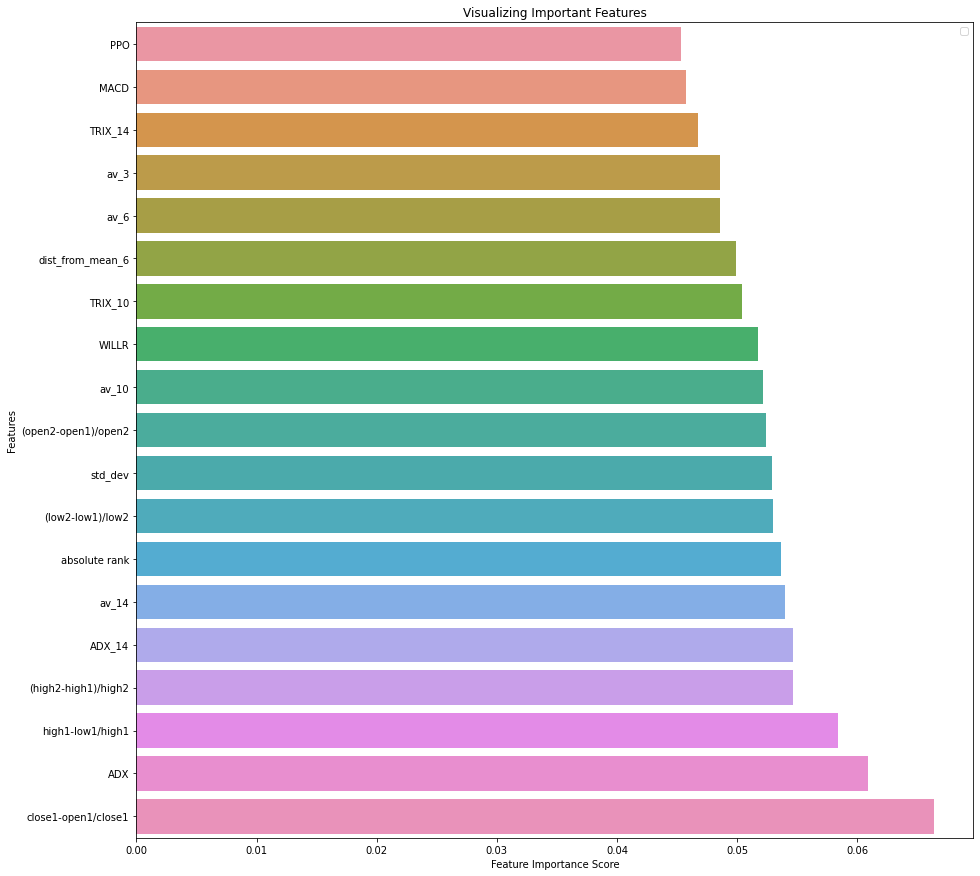

In [ ]:
#---get feature importances ---#
#using the tuning from before--> best one from 5-folds
model6=RandomForestClassifier()
# model6=RandomForestClassifier(n_estimators=800,max_features="log2",bootstrap=True)
for j in assets:
    tmp1=[]
    df1=stock[j] #all the days we need so we can fix the columns 
    X= df1.iloc[:,5:29]
    # X=X.drop(['RSI','TRIX_10','RSI_14','dist_from_mean_6','(Adj Close2-Adj Close1)/Adj Close2','av_6','high1-low1/high1','CMO_14','close1-open1/close1','MACD','PPO','std_dev','TRIX_14','(open2-open1)/open2','av_14','WILLR','(high2-high1)/high2','ADX_14','absolute rank'],axis=1)
    # X=X.drop(['RSI_14','MACD','RSI','dist_from_mean_10','TRIX_10','av_6','close1-open1/close1','CMO_14','absolute rank','dist_from_mean_6','av_10','(open2-open1)/open2'],axis=1)
    X=X.drop(['RSI_14','CMO_14','RSI','dist_from_mean_10','(Adj Close2-Adj Close1)/Adj Close2'],axis=1)
    # print(X) #it has all the days
    y= df1['Rank']
    model6.fit(X,y)
# get importance
importance8 = model6.feature_importances_

# summarize feature importance
d8=dict()
for i,v in enumerate(importance8):
  # print('Feature: %0d, Score: %.5f' % (i,v))
  d8[X.columns[i]]= v
features=X.columns.values
# ax=plt.plot(features,importance1)
# plt.figure(figsize=(15,15))
# plt.barh(list(d8.keys()), list(d8.values()))
# plt.title("Random Forest Classifier")
plt.figure(figsize=(15,15))
df=pd.DataFrame({"Feature_Importance":list(d8.values()) , "Features": list(d8.keys())})
sns.barplot(x='Feature_Importance', y= "Features",data = df,order= df.sort_values('Feature_Importance').Features)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#####Evaluation of the model in relation to feature importances 

In [ ]:
stock1=stock.copy()
# print(stock1)
for j in assets:
  # stock1[j]=stock1[j].drop(['RSI_14','MACD','RSI','dist_from_mean_10','TRIX_10'],axis=1)
  stock1[j]=stock1[j].drop(['RSI_14','CMO_14','RSI','dist_from_mean_10','(Adj Close2-Adj Close1)/Adj Close2'],axis=1)
# model7=RandomForestClassifier(n_estimators=800,max_features="log2",bootstrap=True)
model7=RandomForestClassifier()
prob7,first,last= predictions(model7,assets,stock1,24)
mask = ((stock['ABBV'].index.values >= first.values) & (stock['ABBV'].index.values <= last.values))
prob7['date']=stock['ABBV'].loc[mask].index
prob7_final=pd.DataFrame.from_dict(prob7)
prob7_final.set_index('date')
RPS7= RPS_data(prob7_final,rd)
RPS7= create_RPS(prob7_final,RPS7)
print(RPS7.mean(axis=1).mean())

this is target training Date
2022-01-03    5.0
Name: Rank, dtype: float64
this is the first day of predictions DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None)
this is last for prediction DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
this is target training Date
2022-01-03    5.0
Name: Rank, dtype: float64
this is the first day of predictions DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None)
this is last for prediction DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
this is target training Date
2022-01-03    4.0
Name: Rank, dtype: float64
this is the first day of predictions DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None)
this is last for prediction DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
this is target training Date
2022-01-03    1.0
Name: Rank, dtype: float64
this is the first day of predictions Date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
41   URI -0.037419       1.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.025133       2.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.023133       3.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.022145       4.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.019780       5.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.019048       6.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.015901       7.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.014656       8.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.013605       9.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.013081      10.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.012889      11.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.011775      12.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.011630      13.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.011457      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.011309      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
32  META -0.051373       1.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.041414       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.037040       3.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.028514       4.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.013411       5.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.012402       6.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.011848       7.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.008747       8.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.008602       9.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.008469      10.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.007920      11.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.007491      12.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.006415      13.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.005386      14.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.005148      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
44   XOM -0.025853       1.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.021031       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.017323       3.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.015877       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.009472       5.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.004532       6.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.003839       7.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.002669       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.002624       9.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.002246      10.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG  0.001979      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V  0.003434      12.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.003917      13.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B  0.004168      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.004342      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
15   CDW -0.024646       1.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.007692       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.004894       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.004787       4.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.004305       5.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.002251       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.002160       7.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.001388       8.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.001154       9.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.000447      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.000000      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.002128      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.002713      13.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC  0.003268      14.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.003573      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
24   DRE -0.044243       1.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.035868       2.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.035655       3.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.034692       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.031886       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.030721       6.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.029233       7.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.027136       8.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.025465       9.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.025334      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.024721      11.0  2.0   0.0   1.0   0.0   0.0   0.0
2    AIZ -0.023955      12.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.022847      13.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.022301      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.022264      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
4   AMAT -0.052085       1.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.039210       2.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.037670       3.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.037357       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.035911       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.034995       6.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.032268       7.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.031796       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.031339       9.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.025655      10.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.025195      11.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.023817      12.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.019463      13.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.018925      14.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.017649      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.029974       1.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.026279       2.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.024102       3.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.021065       4.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.017883       5.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.016771       6.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.015722       7.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.015604       8.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.015335       9.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.014825      10.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B -0.012204      11.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.011954      12.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.010892      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.010816      14.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.010471      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.020426       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.012535       2.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.010479       3.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.008587       4.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.007278       5.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.004975       6.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.003527       7.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.000743       8.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.000510       9.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.001205      10.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR  0.002484      11.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.002995      12.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB  0.007600      13.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH  0.008073      14.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG  0.008319      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.042612       1.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.039647       2.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.020181       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.015800       4.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.011244       5.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.009038       6.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.005094       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.005024       8.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.002509       9.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.002407      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.002186      11.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.001029      12.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.000708      13.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.000375      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.000351      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.048308       1.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.041767       2.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.041275       3.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.040974       4.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.040778       5.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.040723       6.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.037669       7.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.033557       8.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.033091       9.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.031853      10.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.030447      11.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.024594      12.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.023439      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.023032      14.0  2.0   0.0   1.0   0.0   0.0   0.0
6   AMZN -0.021809      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
34   PPL -0.072495       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.032227       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.022862       3.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.016784       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.014734       5.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.013914       6.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.013262       7.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.011216       8.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.011121       9.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.010016      10.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.009057      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.008548      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.007928      13.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.007606      14.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.007462      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
22    DG -0.040156       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.034183       2.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.031013       3.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.025777       4.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.021411       5.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.020742       6.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.020083       7.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.019790       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.015753       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.015108      10.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.013476      11.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.013269      12.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.013159      13.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.013074      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.012521      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
15   CDW -0.049947       1.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.047428       2.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.047307       3.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.045750       4.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.042008       5.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.041814       6.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.038434       7.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.035756       8.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.034799       9.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.032016      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.026483      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.026103      12.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.024264      13.0  2.0   0.0   1.0   0.0   0.0   0.0
36  PYPL -0.023747      14.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL -0.021943      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
37    RE -0.028592       1.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.027843       2.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.027806       3.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.026930       4.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.017495       5.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.012635       6.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.012218       7.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.010153       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.009205       9.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.008821      10.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.008115      11.0  2.0   0.0   1.0   0.0   0.0   0.0
5    AMP -0.007546      12.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.006269      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.006130      14.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP -0.005667      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR  0.000473       1.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK  0.001785       2.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS  0.008823       3.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V  0.009066       4.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR  0.011631       5.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC  0.013406       6.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META  0.013873       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG  0.013914       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.016058       9.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.016772      10.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT  0.017239      11.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV  0.017399      12.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.018890      13.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR  0.020373      14.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC  0.021512      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.042218       1.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.041697       2.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.028559       3.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.022848       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.022372       5.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.018507       6.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.016698       7.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.014851       8.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.014451       9.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.014366      10.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.013760      11.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.013562      12.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.012437      13.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.012253      14.0  2.0   0.0   1.0   0.0   0.0   0.0
0   ABBV -0.011836      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.115780       1.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.084713       2.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.069115       3.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.052660       4.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.048883       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.048423       6.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.047381       7.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.043034       8.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.037729       9.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.035729      10.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.034203      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.033083      12.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.027512      13.0  2.0   0.0   1.0   0.0   0.0   0.0
2    AIZ -0.027046      14.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.026677      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
16  CHTR -0.039933       1.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.020731       2.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.002345       3.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL  0.000939       4.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.003131       5.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY  0.003206       6.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.004164       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG  0.004349       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.005897       9.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.006024      10.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE  0.007944      11.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.010609      12.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP  0.011139      13.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.011418      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP  0.012636      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.049433       1.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.048624       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.034239       3.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.027320       4.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.024698       5.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.020561       6.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.019072       7.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.017606       8.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.016060       9.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.015474      10.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.012687      11.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.012164      12.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.008542      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.007108      14.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.006772      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.052998       1.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.043729       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.042757       3.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.038579       4.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.037508       5.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.036910       6.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.036260       7.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.033489       8.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.030682       9.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.028391      10.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.028129      11.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.025985      12.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.023175      13.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.022000      14.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.021163      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.116244       1.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.079907       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.063057       3.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.062931       4.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.058865       5.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.057723       6.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.056220       7.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.053762       8.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.053327       9.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.051853      10.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.048301      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.047880      12.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.046535      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.042820      14.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU -0.041154      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
11  BF-B -0.054752       1.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.040931       2.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.039584       3.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.039558       4.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.036493       5.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.028763       6.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.027543       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.025787       8.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.024390       9.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.022997      10.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.021893      11.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.020666      12.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.018930      13.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.017297      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.015957      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
44   XOM -0.056847       1.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.028516       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.026215       3.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.006641       4.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.005606       5.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.002520       6.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.002195       7.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.002966       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.004606       9.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY  0.005757      10.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.010276      11.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR  0.011461      12.0  2.0   0.0   1.0   0.0   0.0   0.0
0   ABBV  0.011485      13.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK  0.012106      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE  0.013420      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
26   FTV -0.034365       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.028378       2.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.026884       3.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.025744       4.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.017493       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.016663       6.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.016574       7.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.015172       8.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.014318       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.012976      10.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.012967      11.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.011841      12.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.011786      13.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B -0.010585      14.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.010197      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
32  META -0.038932       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.034211       2.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.022524       3.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.021019       4.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.020536       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.020091       6.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.017220       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.016630       8.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.016144       9.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.015891      10.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.015148      11.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.014531      12.0  2.0   0.0   1.0   0.0   0.0   0.0
3   ALLE -0.014083      13.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.013467      14.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP -0.013137      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.037963       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.035798       2.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.028622       3.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.028389       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.025229       5.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.020000       6.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.019325       7.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.018900       8.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.008409       9.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.008373      10.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.007715      11.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.007465      12.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.007173      13.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.005224      14.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.004568      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
44   XOM -0.056913       1.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.015536       2.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.003683       3.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV  0.000527       4.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.002098       5.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB  0.003761       6.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU  0.004851       7.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR  0.005334       8.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY  0.007232       9.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.007360      10.0  2.0   0.0   1.0   0.0   0.0   0.0
12   BMY  0.007366      11.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.008741      12.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.009659      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.013384      14.0  2.0   0.0   1.0   0.0   0.0   0.0
31    KR  0.013894      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
31    KR -0.021356       1.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.010821       2.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.008215       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.003756       4.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.003394       5.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.002420       6.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.001290       7.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.000346       8.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH  0.000703       9.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV  0.001091      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.004528      11.0  2.0   0.0   1.0   0.0   0.0   0.0
2    AIZ  0.004899      12.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR  0.005183      13.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW  0.006501      14.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.008118      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.004579       1.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.001367       2.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.000156       3.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.003138       4.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR  0.003151       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR  0.005119       6.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.005752       7.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY  0.005761       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.005926       9.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE  0.006281      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.006386      11.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG  0.006807      12.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.007274      13.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V  0.007457      14.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.008603      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
1    AEP -0.009164       1.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.004479       2.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.003925       3.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.002728       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.002399       5.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.001775       6.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.001528       7.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.001473       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.001460       9.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.001032      10.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.000953      11.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.000571      12.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.000533      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.000357      14.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY  0.000234      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
23   DPZ -0.037555       1.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.034689       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.028950       3.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.024215       4.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.023096       5.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.022654       6.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.020006       7.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.011283       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.010819       9.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.010613      10.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.009447      11.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.008547      12.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.008401      13.0  2.0   0.0   1.0   0.0   0.0   0.0
3   ALLE -0.007533      14.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.006956      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
22    DG -0.010245       1.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.010202       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.009634       3.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.008049       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.007189       5.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.004609       6.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.004380       7.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.003580       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.003547       9.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.003237      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.001487      11.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.000935      12.0  2.0   0.0   1.0   0.0   0.0   0.0
0   ABBV -0.000250      13.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.000000      14.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR  0.000211      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
17   CNC -0.058353       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.038341       2.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.036582       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.036435       4.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.035565       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.029968       6.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.027753       7.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.027318       8.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.025528       9.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.021161      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.020425      11.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.020320      12.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.019950      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.019913      14.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.018072      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
14  CARR -0.007524       1.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.005301       2.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.002934       3.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.001878       4.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.001196       5.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE  0.001428       6.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.001478       7.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP  0.001629       8.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.001724       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK  0.002841      10.0  2.0   0.0   1.0   0.0   0.0   0.0
44   XOM  0.003007      11.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL  0.003591      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.004275      13.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.004479      14.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC  0.004706      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.020129       1.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.019733       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.011040       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.002576       4.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.002212       5.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.001895       6.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.001153       7.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.000837       8.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG  0.001483       9.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW  0.001763      10.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG  0.002580      11.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B  0.003312      12.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC  0.003513      13.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV  0.003751      14.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.003917      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.037209       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.028052       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.018187       3.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.011219       4.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.007399       5.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.007002       6.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.006718       7.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.006619       8.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.004391       9.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.004264      10.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.004147      11.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.004089      12.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.003048      13.0  2.0   0.0   1.0   0.0   0.0   0.0
12   BMY -0.002320      14.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.000987      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.027150       1.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.012849       2.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.010702       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.005313       4.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.004813       5.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.003637       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV  0.001297       7.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY  0.001641       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.001920       9.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM  0.002201      10.0  2.0   0.0   1.0   0.0   0.0   0.0
5    AMP  0.003600      11.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI  0.004953      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.006079      13.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP  0.006537      14.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU  0.006663      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.045550       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.039875       2.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.030769       3.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.024462       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.022198       5.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.018389       6.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.018280       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.018173       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.017801       9.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.016457      10.0  2.0   0.0   1.0   0.0   0.0   0.0
3   ALLE -0.014776      11.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.013932      12.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.011826      13.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.011571      14.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.011130      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
16  CHTR -0.043149       1.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.035737       2.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.032969       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.031495       4.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.030027       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.029455       6.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.025127       7.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.024095       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.023968       9.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.023259      10.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.023216      11.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.021812      12.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.021277      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.020996      14.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.020833      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.039228       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.033308       2.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.024152       3.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.009821       4.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.009178       5.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.007409       6.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.006847       7.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.006093       8.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.004924       9.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.003550      10.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.003406      11.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.002376      12.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.000714      13.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP  0.000909      14.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST  0.001658      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
37    RE -0.031944       1.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.020954       2.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.019523       3.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.017159       4.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.017061       5.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.015962       6.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.015554       7.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.013481       8.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.011582       9.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.011027      10.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.008472      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.007063      12.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B -0.006780      13.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.006753      14.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.006512      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
4   AMAT -0.059719       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.043748       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.034548       3.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.034212       4.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.031254       5.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.025492       6.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.024863       7.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.021949       8.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.018410       9.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.017958      10.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.017403      11.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.015690      12.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.012043      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.011637      14.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.011296      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.066744       1.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.048945       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.043859       3.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.036836       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.032300       5.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.031315       6.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.028693       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.027555       8.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.021036       9.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.019555      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.014818      11.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.013874      12.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.012025      13.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.009524      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.009115      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
7    AVB -0.022004       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.020136       2.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.017819       3.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.015643       4.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.013980       5.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.013059       6.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.010719       7.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.010128       8.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.008847       9.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.006119      10.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.005183      11.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.004637      12.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.004367      13.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.004330      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.003467      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.022392       1.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.021067       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.019935       3.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.017986       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.016189       5.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.016136       6.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.013917       7.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.012059       8.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.011791       9.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.009982      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.007095      11.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.006568      12.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.004854      13.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL -0.004221      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.003676      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.049200       1.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.037366       2.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.034431       3.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.033370       4.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.031445       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.031010       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.029321       7.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.026402       8.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.025890       9.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.021669      10.0  2.0   0.0   1.0   0.0   0.0   0.0
6   AMZN -0.021614      11.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.020464      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.019643      13.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.019026      14.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.017857      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
31    KR -0.031327       1.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.023707       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.022747       3.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.019271       4.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.015599       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.015551       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.014838       7.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.014453       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.014206       9.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.012543      10.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.011903      11.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.011432      12.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.010977      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.010956      14.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.010718      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
0   ABBV -0.041893       1.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.032234       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.028453       3.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.006979       4.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.005649       5.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.003961       6.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.002469       7.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.001291       8.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.000587       9.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.000509      10.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL  0.001411      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.002170      12.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP  0.002300      13.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG  0.002830      14.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META  0.003969      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
8    AVY -0.034896       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.029950       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.027194       3.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.024653       4.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.023280       5.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.022373       6.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.019710       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.016399       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.016347       9.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.016141      10.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.013615      11.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.012606      12.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.012589      13.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.012546      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.010364      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
10   BDX -0.042624       1.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.039329       2.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.020013       3.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.019182       4.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.018175       5.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.017479       6.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.016909       7.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.015182       8.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.013875       9.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.012376      10.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.010381      11.0  2.0   0.0   1.0   0.0   0.0   0.0
12   BMY -0.009805      12.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.009798      13.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.009523      14.0  2.0   0.0   1.0   0.0   0.0   0.0
31    KR -0.008573      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
29   HIG -0.021053       1.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.018888       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.018460       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.008921       4.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.004560       5.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.003408       6.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.000519       7.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ  0.001056       8.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE  0.003654       9.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH  0.006778      10.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC  0.007054      11.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.007574      12.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU  0.007764      13.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B  0.008449      14.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL  0.008749      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.084507       1.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.077723       2.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.039068       3.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.026041       4.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.017509       5.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.001557       6.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.000697       7.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.000000       8.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV  0.002238       9.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM  0.002279      10.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM  0.003508      11.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.003905      12.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI  0.004581      13.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR  0.005303      14.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS  0.005967      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
32  META -0.061621       1.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.057956       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.050070       3.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.043530       4.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.038960       5.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.037026       6.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.037002       7.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.031588       8.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.030348       9.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.025794      10.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.020630      11.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.018661      12.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.015696      13.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.014962      14.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.014692      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
41   URI -0.068252       1.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.042609       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.041680       3.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.039943       4.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.039868       5.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.039048       6.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.038943       7.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.038254       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.037696       9.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.037185      10.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.034708      11.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU -0.033623      12.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.032506      13.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.031826      14.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.031125      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.045308       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.033713       2.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.015885       3.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.009687       4.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.009185       5.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.008604       6.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.006779       7.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.005439       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.005360       9.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.004417      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.004349      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.002513      12.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.001768      13.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.001538      14.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.001286      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
5    AMP -0.058407       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.053577       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.048484       3.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.046480       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.045751       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.045520       6.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.043832       7.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.042153       8.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.039489       9.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.035176      10.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.035117      11.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.032515      12.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.032301      13.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU -0.031582      14.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.030456      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
27  GOOG -0.037534       1.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.033158       2.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.017277       3.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.014610       4.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.014167       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.013023       6.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.013006       7.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.011966       8.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.010631       9.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.010489      10.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.010145      11.0  2.0   0.0   1.0   0.0   0.0   0.0
6   AMZN -0.008781      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.007961      13.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.006122      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.005709      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
23   DPZ -0.051031       1.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.042572       2.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.017452       3.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.008311       4.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.007514       5.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.005525       6.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.005316       7.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.001619       8.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.000830       9.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ  0.001075      10.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.003511      11.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.008305      12.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC  0.010778      13.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU  0.012005      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE  0.012327      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
6   AMZN -0.140494       1.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.086739       2.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.071508       3.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.060329       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.050188       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.045173       6.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.044874       7.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.042239       8.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.041611       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.040623      10.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.040540      11.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.039949      12.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.037338      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.037224      14.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.036702      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
39  ROST -0.093315       1.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.065007       2.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.053581       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.039041       4.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.036711       5.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.031202       6.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.030988       7.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.029759       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.006228       9.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.000275      10.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.000980      11.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH  0.002792      12.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.006659      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.008831      14.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.026884      15.0  2.0   0.0 

#####Tuning hyperparameterers after feature importances
***

3-fold

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'bootstrap': bootstrap}


In [ ]:
model8=RandomForestClassifier()
model8_random = RandomizedSearchCV(estimator = model8, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
for j in assets:
      df=stock1[j]
      df1=df.dropna()
      X= df1.iloc[:,:-1]
      # print(X)
      y= df1['Rank']
      X_train= X.iloc[:-100] #only the days of one year until 3/01
      Y_train= y.iloc[:-100]                                   #####CHANGE
      model8_random.fit(X_train,Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each

In [ ]:
model8_random.best_params_

{'n_estimators': 400, 'max_features': 'log2', 'bootstrap': True}

5-fold

In [ ]:
model9=RandomForestClassifier()
model9_random = RandomizedSearchCV(estimator = model9, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
for j in assets:
      df=stock1[j]
      df1=df.dropna()
      X= df1.iloc[:,:-1]
      # print(X)
      y= df1['Rank']
      X_train= X.iloc[:-100] #only the days of one year until 3/01
      Y_train= y.iloc[:-100]
      model9_random.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates

In [ ]:
model9_random.best_params_

{'n_estimators': 250, 'max_features': 'auto', 'bootstrap': True}

#####Final Random Forest after feature importances and tunings
***

from 3-folds

In [ ]:
stock2=stock.copy()
# print(stock2)
for j in assets:
  stock2[j]=stock2[j].drop(['RSI_14','CMO_14','RSI','dist_from_mean_10','(Adj Close2-Adj Close1)/Adj Close2'],axis=1)
model10=RandomForestClassifier(n_estimators=400,max_features="log2",bootstrap=True)
print(stock2)
prob10,first,last= predictions(model10,assets,stock2,24)
mask = ((stock['ABBV'].index.values >= first.values) & (stock['ABBV'].index.values <= last.values))
prob10['date']=stock['ABBV'].loc[mask].index
prob10_final=pd.DataFrame.from_dict(prob10)
prob10_final.set_index('date')
RPS10= RPS_data(prob10_final,rd)
RPS10= create_RPS(prob10_final,RPS10)
print(RPS10.mean(axis=1).mean())

{'ABBV':                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-03-04  106.500000  107.750000  104.949997  105.650002   99.167709   
2021-03-05  106.010002  106.989998  104.070000  106.699997  100.153282   
2021-03-08  106.849998  108.160004  105.800003  106.110001   99.599480   
2021-03-09  106.480003  108.690002  106.440002  106.790001  100.237770   
2021-03-10  107.389999  108.360001  107.050003  108.000000  101.373528   
...                ...         ...         ...         ...         ...   
2022-05-23  151.649994  152.000000  147.190002  148.029999  146.658188   
2022-05-24  147.029999  151.350006  146.610001  149.110001  147.728180   
2022-05-25  150.360001  152.990005  149.789993  151.960007  150.551773   
2022-05-26  151.630005  153.070007  150.389999  150.570007  149.174652   
2022-05-27  149.520004  150.050003  147.750000  150.000000  148.609924   

            (open2-open1)/op

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
41   URI -0.037419       1.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.025133       2.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.023133       3.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.022145       4.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.019780       5.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.019048       6.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.015901       7.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.014656       8.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.013605       9.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.013081      10.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.012889      11.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.011775      12.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.011630      13.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.011457      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.011309      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
32  META -0.051373       1.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.041414       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.037040       3.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.028514       4.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.013411       5.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.012402       6.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.011848       7.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.008747       8.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.008602       9.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.008469      10.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.007920      11.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.007491      12.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.006415      13.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.005386      14.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.005148      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
44   XOM -0.025853       1.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.021031       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.017323       3.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.015877       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.009472       5.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.004532       6.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.003839       7.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.002669       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.002624       9.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.002246      10.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG  0.001979      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V  0.003434      12.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.003917      13.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B  0.004168      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.004342      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
15   CDW -0.024646       1.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.007692       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.004894       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.004787       4.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.004305       5.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.002251       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.002160       7.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.001388       8.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.001154       9.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.000447      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.000000      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.002128      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.002713      13.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC  0.003268      14.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.003573      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
24   DRE -0.044243       1.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.035868       2.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.035655       3.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.034692       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.031886       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.030721       6.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.029233       7.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.027136       8.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.025465       9.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.025334      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.024721      11.0  2.0   0.0   1.0   0.0   0.0   0.0
2    AIZ -0.023955      12.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.022847      13.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.022301      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.022264      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
4   AMAT -0.052085       1.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.039210       2.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.037670       3.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.037357       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.035911       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.034995       6.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.032268       7.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.031796       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.031339       9.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.025655      10.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.025195      11.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.023817      12.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.019463      13.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.018925      14.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.017649      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.029974       1.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.026279       2.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.024102       3.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.021065       4.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.017883       5.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.016771       6.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.015722       7.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.015604       8.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.015335       9.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.014825      10.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B -0.012204      11.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.011954      12.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.010892      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.010816      14.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.010471      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.020426       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.012535       2.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.010479       3.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.008587       4.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.007278       5.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.004975       6.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.003527       7.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.000743       8.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.000510       9.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.001205      10.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR  0.002484      11.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.002995      12.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB  0.007600      13.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH  0.008073      14.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG  0.008319      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.042612       1.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.039647       2.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.020181       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.015800       4.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.011244       5.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.009038       6.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.005094       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.005024       8.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.002509       9.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.002407      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.002186      11.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.001029      12.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.000708      13.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.000375      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.000351      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.048308       1.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.041767       2.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.041275       3.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.040974       4.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.040778       5.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.040723       6.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.037669       7.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.033557       8.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.033091       9.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.031853      10.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.030447      11.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.024594      12.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.023439      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.023032      14.0  2.0   0.0   1.0   0.0   0.0   0.0
6   AMZN -0.021809      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
34   PPL -0.072495       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.032227       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.022862       3.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.016784       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.014734       5.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.013914       6.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.013262       7.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.011216       8.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.011121       9.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.010016      10.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.009057      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.008548      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.007928      13.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.007606      14.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.007462      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
22    DG -0.040156       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.034183       2.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.031013       3.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.025777       4.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.021411       5.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.020742       6.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.020083       7.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.019790       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.015753       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.015108      10.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.013476      11.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.013269      12.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.013159      13.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.013074      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.012521      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
15   CDW -0.049947       1.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.047428       2.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.047307       3.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.045750       4.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.042008       5.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.041814       6.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.038434       7.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.035756       8.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.034799       9.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.032016      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.026483      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.026103      12.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.024264      13.0  2.0   0.0   1.0   0.0   0.0   0.0
36  PYPL -0.023747      14.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL -0.021943      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
37    RE -0.028592       1.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.027843       2.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.027806       3.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.026930       4.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.017495       5.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.012635       6.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.012218       7.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.010153       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.009205       9.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.008821      10.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.008115      11.0  2.0   0.0   1.0   0.0   0.0   0.0
5    AMP -0.007546      12.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.006269      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.006130      14.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP -0.005667      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR  0.000473       1.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK  0.001785       2.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS  0.008823       3.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V  0.009066       4.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR  0.011631       5.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC  0.013406       6.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META  0.013873       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG  0.013914       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.016058       9.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.016772      10.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT  0.017239      11.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV  0.017399      12.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.018890      13.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR  0.020373      14.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC  0.021512      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.042218       1.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.041697       2.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.028559       3.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.022848       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.022372       5.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.018507       6.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.016698       7.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.014851       8.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.014451       9.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.014366      10.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.013760      11.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.013562      12.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.012437      13.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.012253      14.0  2.0   0.0   1.0   0.0   0.0   0.0
0   ABBV -0.011836      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.115780       1.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.084713       2.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.069115       3.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.052660       4.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.048883       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.048423       6.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.047381       7.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.043034       8.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.037729       9.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.035729      10.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.034203      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.033083      12.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.027512      13.0  2.0   0.0   1.0   0.0   0.0   0.0
2    AIZ -0.027046      14.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.026677      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
16  CHTR -0.039933       1.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.020731       2.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.002345       3.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL  0.000939       4.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.003131       5.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY  0.003206       6.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.004164       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG  0.004349       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.005897       9.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.006024      10.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE  0.007944      11.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.010609      12.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP  0.011139      13.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.011418      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP  0.012636      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.049433       1.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.048624       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.034239       3.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.027320       4.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.024698       5.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.020561       6.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.019072       7.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.017606       8.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.016060       9.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.015474      10.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.012687      11.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.012164      12.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.008542      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.007108      14.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.006772      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.052998       1.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.043729       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.042757       3.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.038579       4.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.037508       5.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.036910       6.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.036260       7.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.033489       8.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.030682       9.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.028391      10.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.028129      11.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.025985      12.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.023175      13.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.022000      14.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.021163      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.116244       1.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.079907       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.063057       3.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.062931       4.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.058865       5.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.057723       6.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.056220       7.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.053762       8.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.053327       9.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.051853      10.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.048301      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.047880      12.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.046535      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.042820      14.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU -0.041154      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
11  BF-B -0.054752       1.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.040931       2.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.039584       3.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.039558       4.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.036493       5.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.028763       6.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.027543       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.025787       8.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.024390       9.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.022997      10.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.021893      11.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.020666      12.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.018930      13.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.017297      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.015957      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
44   XOM -0.056847       1.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.028516       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.026215       3.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.006641       4.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.005606       5.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.002520       6.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.002195       7.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.002966       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.004606       9.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY  0.005757      10.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.010276      11.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR  0.011461      12.0  2.0   0.0   1.0   0.0   0.0   0.0
0   ABBV  0.011485      13.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK  0.012106      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE  0.013420      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
26   FTV -0.034365       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.028378       2.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.026884       3.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.025744       4.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.017493       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.016663       6.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.016574       7.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.015172       8.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.014318       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.012976      10.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.012967      11.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.011841      12.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.011786      13.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B -0.010585      14.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.010197      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
32  META -0.038932       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.034211       2.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.022524       3.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.021019       4.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.020536       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.020091       6.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.017220       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.016630       8.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.016144       9.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.015891      10.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.015148      11.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.014531      12.0  2.0   0.0   1.0   0.0   0.0   0.0
3   ALLE -0.014083      13.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.013467      14.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP -0.013137      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.037963       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.035798       2.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.028622       3.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.028389       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.025229       5.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.020000       6.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.019325       7.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.018900       8.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.008409       9.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.008373      10.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.007715      11.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.007465      12.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.007173      13.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.005224      14.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.004568      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
44   XOM -0.056913       1.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.015536       2.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.003683       3.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV  0.000527       4.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.002098       5.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB  0.003761       6.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU  0.004851       7.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR  0.005334       8.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY  0.007232       9.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.007360      10.0  2.0   0.0   1.0   0.0   0.0   0.0
12   BMY  0.007366      11.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.008741      12.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.009659      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.013384      14.0  2.0   0.0   1.0   0.0   0.0   0.0
31    KR  0.013894      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
31    KR -0.021356       1.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.010821       2.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.008215       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.003756       4.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.003394       5.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.002420       6.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.001290       7.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.000346       8.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH  0.000703       9.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV  0.001091      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.004528      11.0  2.0   0.0   1.0   0.0   0.0   0.0
2    AIZ  0.004899      12.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR  0.005183      13.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW  0.006501      14.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.008118      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.004579       1.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.001367       2.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.000156       3.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.003138       4.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR  0.003151       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR  0.005119       6.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.005752       7.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY  0.005761       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.005926       9.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE  0.006281      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.006386      11.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG  0.006807      12.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.007274      13.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V  0.007457      14.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.008603      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
1    AEP -0.009164       1.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.004479       2.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.003925       3.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.002728       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.002399       5.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.001775       6.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.001528       7.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.001473       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.001460       9.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.001032      10.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.000953      11.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.000571      12.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.000533      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.000357      14.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY  0.000234      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
23   DPZ -0.037555       1.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.034689       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.028950       3.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.024215       4.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.023096       5.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.022654       6.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.020006       7.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.011283       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.010819       9.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.010613      10.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.009447      11.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.008547      12.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.008401      13.0  2.0   0.0   1.0   0.0   0.0   0.0
3   ALLE -0.007533      14.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.006956      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
22    DG -0.010245       1.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.010202       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.009634       3.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.008049       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.007189       5.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.004609       6.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.004380       7.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.003580       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.003547       9.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.003237      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.001487      11.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.000935      12.0  2.0   0.0   1.0   0.0   0.0   0.0
0   ABBV -0.000250      13.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.000000      14.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR  0.000211      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
17   CNC -0.058353       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.038341       2.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.036582       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.036435       4.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.035565       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.029968       6.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.027753       7.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.027318       8.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.025528       9.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.021161      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.020425      11.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.020320      12.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.019950      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.019913      14.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.018072      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
14  CARR -0.007524       1.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.005301       2.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.002934       3.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.001878       4.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.001196       5.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE  0.001428       6.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.001478       7.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP  0.001629       8.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.001724       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK  0.002841      10.0  2.0   0.0   1.0   0.0   0.0   0.0
44   XOM  0.003007      11.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL  0.003591      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.004275      13.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.004479      14.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC  0.004706      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.020129       1.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.019733       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.011040       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.002576       4.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.002212       5.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.001895       6.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.001153       7.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.000837       8.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG  0.001483       9.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW  0.001763      10.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG  0.002580      11.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B  0.003312      12.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC  0.003513      13.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV  0.003751      14.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.003917      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.037209       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.028052       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.018187       3.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.011219       4.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.007399       5.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.007002       6.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.006718       7.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.006619       8.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.004391       9.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.004264      10.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.004147      11.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.004089      12.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.003048      13.0  2.0   0.0   1.0   0.0   0.0   0.0
12   BMY -0.002320      14.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.000987      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.027150       1.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.012849       2.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.010702       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.005313       4.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.004813       5.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.003637       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV  0.001297       7.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY  0.001641       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.001920       9.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM  0.002201      10.0  2.0   0.0   1.0   0.0   0.0   0.0
5    AMP  0.003600      11.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI  0.004953      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.006079      13.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP  0.006537      14.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU  0.006663      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.045550       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.039875       2.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.030769       3.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.024462       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.022198       5.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.018389       6.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.018280       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.018173       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.017801       9.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.016457      10.0  2.0   0.0   1.0   0.0   0.0   0.0
3   ALLE -0.014776      11.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.013932      12.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.011826      13.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.011571      14.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.011130      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
16  CHTR -0.043149       1.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.035737       2.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.032969       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.031495       4.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.030027       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.029455       6.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.025127       7.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.024095       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.023968       9.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.023259      10.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.023216      11.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.021812      12.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.021277      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.020996      14.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.020833      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.039228       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.033308       2.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.024152       3.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.009821       4.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.009178       5.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.007409       6.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.006847       7.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.006093       8.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.004924       9.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.003550      10.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.003406      11.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.002376      12.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.000714      13.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP  0.000909      14.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST  0.001658      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
37    RE -0.031944       1.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.020954       2.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.019523       3.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.017159       4.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.017061       5.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.015962       6.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.015554       7.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.013481       8.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.011582       9.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.011027      10.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.008472      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.007063      12.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B -0.006780      13.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.006753      14.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.006512      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
4   AMAT -0.059719       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.043748       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.034548       3.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.034212       4.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.031254       5.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.025492       6.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.024863       7.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.021949       8.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.018410       9.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.017958      10.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.017403      11.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.015690      12.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.012043      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.011637      14.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.011296      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.066744       1.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.048945       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.043859       3.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.036836       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.032300       5.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.031315       6.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.028693       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.027555       8.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.021036       9.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.019555      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.014818      11.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.013874      12.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.012025      13.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.009524      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.009115      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
7    AVB -0.022004       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.020136       2.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.017819       3.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.015643       4.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.013980       5.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.013059       6.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.010719       7.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.010128       8.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.008847       9.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.006119      10.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.005183      11.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.004637      12.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.004367      13.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.004330      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.003467      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.022392       1.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.021067       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.019935       3.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.017986       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.016189       5.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.016136       6.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.013917       7.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.012059       8.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.011791       9.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.009982      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.007095      11.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.006568      12.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.004854      13.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL -0.004221      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.003676      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.049200       1.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.037366       2.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.034431       3.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.033370       4.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.031445       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.031010       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.029321       7.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.026402       8.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.025890       9.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.021669      10.0  2.0   0.0   1.0   0.0   0.0   0.0
6   AMZN -0.021614      11.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.020464      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.019643      13.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.019026      14.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.017857      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
31    KR -0.031327       1.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.023707       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.022747       3.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.019271       4.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.015599       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.015551       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.014838       7.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.014453       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.014206       9.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.012543      10.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.011903      11.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.011432      12.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.010977      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.010956      14.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.010718      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
0   ABBV -0.041893       1.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.032234       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.028453       3.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.006979       4.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.005649       5.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.003961       6.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.002469       7.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.001291       8.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.000587       9.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.000509      10.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL  0.001411      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.002170      12.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP  0.002300      13.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG  0.002830      14.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META  0.003969      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
8    AVY -0.034896       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.029950       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.027194       3.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.024653       4.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.023280       5.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.022373       6.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.019710       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.016399       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.016347       9.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.016141      10.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.013615      11.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.012606      12.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.012589      13.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.012546      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.010364      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
10   BDX -0.042624       1.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.039329       2.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.020013       3.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.019182       4.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.018175       5.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.017479       6.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.016909       7.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.015182       8.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.013875       9.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.012376      10.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.010381      11.0  2.0   0.0   1.0   0.0   0.0   0.0
12   BMY -0.009805      12.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.009798      13.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.009523      14.0  2.0   0.0   1.0   0.0   0.0   0.0
31    KR -0.008573      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
29   HIG -0.021053       1.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.018888       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.018460       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.008921       4.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.004560       5.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.003408       6.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.000519       7.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ  0.001056       8.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE  0.003654       9.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH  0.006778      10.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC  0.007054      11.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.007574      12.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU  0.007764      13.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B  0.008449      14.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL  0.008749      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.084507       1.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.077723       2.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.039068       3.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.026041       4.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.017509       5.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.001557       6.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.000697       7.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.000000       8.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV  0.002238       9.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM  0.002279      10.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM  0.003508      11.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.003905      12.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI  0.004581      13.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR  0.005303      14.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS  0.005967      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
32  META -0.061621       1.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.057956       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.050070       3.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.043530       4.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.038960       5.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.037026       6.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.037002       7.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.031588       8.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.030348       9.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.025794      10.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.020630      11.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.018661      12.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.015696      13.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.014962      14.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.014692      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
41   URI -0.068252       1.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.042609       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.041680       3.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.039943       4.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.039868       5.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.039048       6.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.038943       7.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.038254       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.037696       9.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.037185      10.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.034708      11.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU -0.033623      12.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.032506      13.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.031826      14.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.031125      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.045308       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.033713       2.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.015885       3.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.009687       4.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.009185       5.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.008604       6.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.006779       7.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.005439       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.005360       9.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.004417      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.004349      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.002513      12.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.001768      13.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.001538      14.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.001286      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
5    AMP -0.058407       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.053577       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.048484       3.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.046480       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.045751       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.045520       6.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.043832       7.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.042153       8.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.039489       9.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.035176      10.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.035117      11.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.032515      12.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.032301      13.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU -0.031582      14.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.030456      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
27  GOOG -0.037534       1.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.033158       2.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.017277       3.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.014610       4.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.014167       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.013023       6.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.013006       7.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.011966       8.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.010631       9.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.010489      10.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.010145      11.0  2.0   0.0   1.0   0.0   0.0   0.0
6   AMZN -0.008781      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.007961      13.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.006122      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.005709      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
23   DPZ -0.051031       1.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.042572       2.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.017452       3.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.008311       4.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.007514       5.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.005525       6.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.005316       7.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.001619       8.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.000830       9.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ  0.001075      10.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.003511      11.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.008305      12.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC  0.010778      13.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU  0.012005      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE  0.012327      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
6   AMZN -0.140494       1.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.086739       2.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.071508       3.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.060329       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.050188       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.045173       6.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.044874       7.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.042239       8.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.041611       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.040623      10.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.040540      11.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.039949      12.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.037338      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.037224      14.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.036702      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
39  ROST -0.093315       1.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.065007       2.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.053581       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.039041       4.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.036711       5.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.031202       6.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.030988       7.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.029759       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.006228       9.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.000275      10.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.000980      11.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH  0.002792      12.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.006659      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.008831      14.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.026884      15.0  2.0   0.0 

In [ ]:
#save the best results
RPS10.to_excel('Method_9-Random_Forest_next_month_predict.xlsx')

from 5-folds

In [ ]:
model11=RandomForestClassifier(n_estimators=250,max_features="auto",bootstrap=True)
prob11,first,last= predictions(model11,assets,stock2,24)
mask = ((stock['ABBV'].index.values >= first.values) & (stock['ABBV'].index.values <= last.values))
prob11['date']=stock['ABBV'].loc[mask].index
prob11_final=pd.DataFrame.from_dict(prob11)
prob11_final.set_index('date')
RPS11= RPS_data(prob11_final,rd)
RPS11= create_RPS(prob11_final,RPS11)
print(RPS11.mean(axis=1).mean())

this is target training Date
2022-01-03    5.0
Name: Rank, dtype: float64
this is the first day of predictions DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None)
this is last for prediction DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
this is target training Date
2022-01-03    5.0
Name: Rank, dtype: float64
this is the first day of predictions DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None)
this is last for prediction DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
this is target training Date
2022-01-03    4.0
Name: Rank, dtype: float64
this is the first day of predictions DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None)
this is last for prediction DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
this is target training Date
2022-01-03    1.0
Name: Rank, dtype: float64
this is the first day of predictions Date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
41   URI -0.037419       1.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.025133       2.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.023133       3.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.022145       4.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.019780       5.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.019048       6.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.015901       7.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.014656       8.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.013605       9.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.013081      10.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.012889      11.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.011775      12.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.011630      13.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.011457      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.011309      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
32  META -0.051373       1.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.041414       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.037040       3.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.028514       4.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.013411       5.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.012402       6.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.011848       7.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.008747       8.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.008602       9.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.008469      10.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.007920      11.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.007491      12.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.006415      13.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.005386      14.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.005148      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
44   XOM -0.025853       1.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.021031       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.017323       3.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.015877       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.009472       5.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.004532       6.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.003839       7.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.002669       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.002624       9.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.002246      10.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG  0.001979      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V  0.003434      12.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.003917      13.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B  0.004168      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.004342      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
15   CDW -0.024646       1.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.007692       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.004894       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.004787       4.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.004305       5.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.002251       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.002160       7.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.001388       8.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.001154       9.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.000447      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.000000      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.002128      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.002713      13.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC  0.003268      14.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.003573      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
24   DRE -0.044243       1.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.035868       2.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.035655       3.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.034692       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.031886       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.030721       6.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.029233       7.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.027136       8.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.025465       9.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.025334      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.024721      11.0  2.0   0.0   1.0   0.0   0.0   0.0
2    AIZ -0.023955      12.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.022847      13.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.022301      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.022264      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
4   AMAT -0.052085       1.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.039210       2.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.037670       3.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.037357       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.035911       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.034995       6.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.032268       7.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.031796       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.031339       9.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.025655      10.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.025195      11.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.023817      12.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.019463      13.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.018925      14.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.017649      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.029974       1.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.026279       2.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.024102       3.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.021065       4.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.017883       5.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.016771       6.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.015722       7.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.015604       8.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.015335       9.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.014825      10.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B -0.012204      11.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.011954      12.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.010892      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.010816      14.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.010471      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.020426       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.012535       2.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.010479       3.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.008587       4.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.007278       5.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.004975       6.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.003527       7.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.000743       8.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.000510       9.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.001205      10.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR  0.002484      11.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.002995      12.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB  0.007600      13.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH  0.008073      14.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG  0.008319      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.042612       1.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.039647       2.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.020181       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.015800       4.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.011244       5.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.009038       6.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.005094       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.005024       8.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.002509       9.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.002407      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.002186      11.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.001029      12.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.000708      13.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.000375      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.000351      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.048308       1.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.041767       2.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.041275       3.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.040974       4.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.040778       5.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.040723       6.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.037669       7.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.033557       8.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.033091       9.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.031853      10.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.030447      11.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.024594      12.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.023439      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.023032      14.0  2.0   0.0   1.0   0.0   0.0   0.0
6   AMZN -0.021809      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
34   PPL -0.072495       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.032227       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.022862       3.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.016784       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.014734       5.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.013914       6.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.013262       7.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.011216       8.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.011121       9.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.010016      10.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.009057      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.008548      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.007928      13.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.007606      14.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.007462      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
22    DG -0.040156       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.034183       2.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.031013       3.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.025777       4.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.021411       5.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.020742       6.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.020083       7.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.019790       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.015753       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.015108      10.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.013476      11.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.013269      12.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.013159      13.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.013074      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.012521      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
15   CDW -0.049947       1.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.047428       2.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.047307       3.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.045750       4.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.042008       5.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.041814       6.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.038434       7.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.035756       8.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.034799       9.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.032016      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.026483      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.026103      12.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.024264      13.0  2.0   0.0   1.0   0.0   0.0   0.0
36  PYPL -0.023747      14.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL -0.021943      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
37    RE -0.028592       1.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.027843       2.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.027806       3.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.026930       4.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.017495       5.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.012635       6.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.012218       7.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.010153       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.009205       9.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.008821      10.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.008115      11.0  2.0   0.0   1.0   0.0   0.0   0.0
5    AMP -0.007546      12.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.006269      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.006130      14.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP -0.005667      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR  0.000473       1.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK  0.001785       2.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS  0.008823       3.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V  0.009066       4.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR  0.011631       5.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC  0.013406       6.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META  0.013873       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG  0.013914       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.016058       9.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.016772      10.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT  0.017239      11.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV  0.017399      12.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.018890      13.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR  0.020373      14.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC  0.021512      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.042218       1.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.041697       2.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.028559       3.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.022848       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.022372       5.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.018507       6.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.016698       7.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.014851       8.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.014451       9.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.014366      10.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.013760      11.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.013562      12.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.012437      13.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.012253      14.0  2.0   0.0   1.0   0.0   0.0   0.0
0   ABBV -0.011836      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.115780       1.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.084713       2.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.069115       3.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.052660       4.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.048883       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.048423       6.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.047381       7.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.043034       8.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.037729       9.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.035729      10.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.034203      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.033083      12.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.027512      13.0  2.0   0.0   1.0   0.0   0.0   0.0
2    AIZ -0.027046      14.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.026677      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
16  CHTR -0.039933       1.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.020731       2.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.002345       3.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL  0.000939       4.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.003131       5.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY  0.003206       6.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.004164       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG  0.004349       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.005897       9.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.006024      10.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE  0.007944      11.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.010609      12.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP  0.011139      13.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.011418      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP  0.012636      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.049433       1.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.048624       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.034239       3.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.027320       4.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.024698       5.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.020561       6.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.019072       7.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.017606       8.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.016060       9.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.015474      10.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.012687      11.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.012164      12.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.008542      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.007108      14.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.006772      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.052998       1.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.043729       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.042757       3.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.038579       4.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.037508       5.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.036910       6.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.036260       7.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.033489       8.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.030682       9.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.028391      10.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.028129      11.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.025985      12.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.023175      13.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.022000      14.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.021163      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.116244       1.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.079907       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.063057       3.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.062931       4.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.058865       5.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.057723       6.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.056220       7.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.053762       8.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.053327       9.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.051853      10.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.048301      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.047880      12.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.046535      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.042820      14.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU -0.041154      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
11  BF-B -0.054752       1.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.040931       2.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.039584       3.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.039558       4.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.036493       5.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.028763       6.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.027543       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.025787       8.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.024390       9.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.022997      10.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.021893      11.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.020666      12.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.018930      13.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.017297      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.015957      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
44   XOM -0.056847       1.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.028516       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.026215       3.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.006641       4.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.005606       5.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.002520       6.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.002195       7.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.002966       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.004606       9.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY  0.005757      10.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.010276      11.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR  0.011461      12.0  2.0   0.0   1.0   0.0   0.0   0.0
0   ABBV  0.011485      13.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK  0.012106      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE  0.013420      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
26   FTV -0.034365       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.028378       2.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.026884       3.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.025744       4.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.017493       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.016663       6.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.016574       7.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.015172       8.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.014318       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.012976      10.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.012967      11.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.011841      12.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.011786      13.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B -0.010585      14.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.010197      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
32  META -0.038932       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.034211       2.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.022524       3.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.021019       4.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.020536       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.020091       6.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.017220       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.016630       8.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.016144       9.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.015891      10.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.015148      11.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.014531      12.0  2.0   0.0   1.0   0.0   0.0   0.0
3   ALLE -0.014083      13.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.013467      14.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP -0.013137      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.037963       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.035798       2.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.028622       3.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.028389       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.025229       5.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.020000       6.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.019325       7.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.018900       8.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.008409       9.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.008373      10.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.007715      11.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.007465      12.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.007173      13.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.005224      14.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.004568      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
44   XOM -0.056913       1.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.015536       2.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.003683       3.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV  0.000527       4.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.002098       5.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB  0.003761       6.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU  0.004851       7.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR  0.005334       8.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY  0.007232       9.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.007360      10.0  2.0   0.0   1.0   0.0   0.0   0.0
12   BMY  0.007366      11.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.008741      12.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.009659      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.013384      14.0  2.0   0.0   1.0   0.0   0.0   0.0
31    KR  0.013894      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
31    KR -0.021356       1.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.010821       2.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.008215       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.003756       4.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.003394       5.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.002420       6.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.001290       7.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.000346       8.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH  0.000703       9.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV  0.001091      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.004528      11.0  2.0   0.0   1.0   0.0   0.0   0.0
2    AIZ  0.004899      12.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR  0.005183      13.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW  0.006501      14.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.008118      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.004579       1.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.001367       2.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.000156       3.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.003138       4.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR  0.003151       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR  0.005119       6.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.005752       7.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY  0.005761       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.005926       9.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE  0.006281      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.006386      11.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG  0.006807      12.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.007274      13.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V  0.007457      14.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.008603      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
1    AEP -0.009164       1.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.004479       2.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.003925       3.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.002728       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.002399       5.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.001775       6.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.001528       7.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.001473       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.001460       9.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.001032      10.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.000953      11.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.000571      12.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.000533      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.000357      14.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY  0.000234      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
23   DPZ -0.037555       1.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.034689       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.028950       3.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.024215       4.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.023096       5.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.022654       6.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.020006       7.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.011283       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.010819       9.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.010613      10.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.009447      11.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.008547      12.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.008401      13.0  2.0   0.0   1.0   0.0   0.0   0.0
3   ALLE -0.007533      14.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.006956      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
22    DG -0.010245       1.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.010202       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.009634       3.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.008049       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.007189       5.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.004609       6.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.004380       7.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.003580       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.003547       9.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.003237      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.001487      11.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.000935      12.0  2.0   0.0   1.0   0.0   0.0   0.0
0   ABBV -0.000250      13.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.000000      14.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR  0.000211      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
17   CNC -0.058353       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.038341       2.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.036582       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.036435       4.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.035565       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.029968       6.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.027753       7.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.027318       8.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.025528       9.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.021161      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.020425      11.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.020320      12.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.019950      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.019913      14.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.018072      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
14  CARR -0.007524       1.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.005301       2.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.002934       3.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.001878       4.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.001196       5.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE  0.001428       6.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.001478       7.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP  0.001629       8.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.001724       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK  0.002841      10.0  2.0   0.0   1.0   0.0   0.0   0.0
44   XOM  0.003007      11.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL  0.003591      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.004275      13.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.004479      14.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC  0.004706      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.020129       1.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.019733       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.011040       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.002576       4.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.002212       5.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.001895       6.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.001153       7.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.000837       8.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG  0.001483       9.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW  0.001763      10.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG  0.002580      11.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B  0.003312      12.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC  0.003513      13.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV  0.003751      14.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.003917      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.037209       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.028052       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.018187       3.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.011219       4.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.007399       5.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.007002       6.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.006718       7.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.006619       8.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.004391       9.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.004264      10.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.004147      11.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.004089      12.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.003048      13.0  2.0   0.0   1.0   0.0   0.0   0.0
12   BMY -0.002320      14.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.000987      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.027150       1.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.012849       2.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.010702       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.005313       4.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.004813       5.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.003637       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV  0.001297       7.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY  0.001641       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.001920       9.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM  0.002201      10.0  2.0   0.0   1.0   0.0   0.0   0.0
5    AMP  0.003600      11.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI  0.004953      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.006079      13.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP  0.006537      14.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU  0.006663      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.045550       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.039875       2.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.030769       3.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.024462       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.022198       5.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.018389       6.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.018280       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.018173       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.017801       9.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.016457      10.0  2.0   0.0   1.0   0.0   0.0   0.0
3   ALLE -0.014776      11.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.013932      12.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.011826      13.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.011571      14.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.011130      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
16  CHTR -0.043149       1.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.035737       2.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.032969       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.031495       4.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.030027       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.029455       6.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.025127       7.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.024095       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.023968       9.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.023259      10.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.023216      11.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.021812      12.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.021277      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.020996      14.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.020833      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.039228       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.033308       2.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.024152       3.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.009821       4.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.009178       5.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.007409       6.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.006847       7.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.006093       8.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.004924       9.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.003550      10.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.003406      11.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.002376      12.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.000714      13.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP  0.000909      14.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST  0.001658      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
37    RE -0.031944       1.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.020954       2.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.019523       3.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.017159       4.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.017061       5.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.015962       6.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.015554       7.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.013481       8.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.011582       9.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.011027      10.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.008472      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.007063      12.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B -0.006780      13.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.006753      14.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.006512      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
4   AMAT -0.059719       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.043748       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.034548       3.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.034212       4.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.031254       5.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.025492       6.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.024863       7.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.021949       8.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.018410       9.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.017958      10.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.017403      11.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.015690      12.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.012043      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.011637      14.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.011296      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.066744       1.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.048945       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.043859       3.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.036836       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.032300       5.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.031315       6.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.028693       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.027555       8.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.021036       9.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.019555      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.014818      11.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.013874      12.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.012025      13.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.009524      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.009115      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
7    AVB -0.022004       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.020136       2.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.017819       3.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.015643       4.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.013980       5.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.013059       6.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.010719       7.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.010128       8.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.008847       9.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.006119      10.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.005183      11.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.004637      12.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.004367      13.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.004330      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.003467      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.022392       1.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.021067       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.019935       3.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.017986       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.016189       5.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.016136       6.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.013917       7.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.012059       8.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.011791       9.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.009982      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.007095      11.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.006568      12.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.004854      13.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL -0.004221      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.003676      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.049200       1.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.037366       2.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.034431       3.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.033370       4.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.031445       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.031010       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.029321       7.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.026402       8.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.025890       9.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.021669      10.0  2.0   0.0   1.0   0.0   0.0   0.0
6   AMZN -0.021614      11.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.020464      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.019643      13.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.019026      14.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.017857      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
31    KR -0.031327       1.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.023707       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.022747       3.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.019271       4.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.015599       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.015551       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.014838       7.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.014453       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.014206       9.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.012543      10.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.011903      11.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.011432      12.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.010977      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.010956      14.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.010718      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
0   ABBV -0.041893       1.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.032234       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.028453       3.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.006979       4.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.005649       5.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.003961       6.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.002469       7.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.001291       8.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.000587       9.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.000509      10.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL  0.001411      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.002170      12.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP  0.002300      13.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG  0.002830      14.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META  0.003969      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
8    AVY -0.034896       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.029950       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.027194       3.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.024653       4.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.023280       5.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.022373       6.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.019710       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.016399       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.016347       9.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.016141      10.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.013615      11.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.012606      12.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.012589      13.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.012546      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.010364      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
10   BDX -0.042624       1.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.039329       2.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.020013       3.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.019182       4.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.018175       5.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.017479       6.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.016909       7.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.015182       8.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.013875       9.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.012376      10.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.010381      11.0  2.0   0.0   1.0   0.0   0.0   0.0
12   BMY -0.009805      12.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.009798      13.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.009523      14.0  2.0   0.0   1.0   0.0   0.0   0.0
31    KR -0.008573      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
29   HIG -0.021053       1.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.018888       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.018460       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.008921       4.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.004560       5.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.003408       6.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.000519       7.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ  0.001056       8.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE  0.003654       9.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH  0.006778      10.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC  0.007054      11.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.007574      12.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU  0.007764      13.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B  0.008449      14.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL  0.008749      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.084507       1.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.077723       2.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.039068       3.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.026041       4.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.017509       5.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.001557       6.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.000697       7.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.000000       8.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV  0.002238       9.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM  0.002279      10.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM  0.003508      11.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.003905      12.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI  0.004581      13.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR  0.005303      14.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS  0.005967      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
32  META -0.061621       1.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.057956       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.050070       3.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.043530       4.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.038960       5.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.037026       6.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.037002       7.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.031588       8.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.030348       9.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.025794      10.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.020630      11.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.018661      12.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.015696      13.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.014962      14.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.014692      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
41   URI -0.068252       1.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.042609       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.041680       3.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.039943       4.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.039868       5.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.039048       6.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.038943       7.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.038254       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.037696       9.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.037185      10.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.034708      11.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU -0.033623      12.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.032506      13.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.031826      14.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.031125      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.045308       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.033713       2.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.015885       3.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.009687       4.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.009185       5.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.008604       6.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.006779       7.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.005439       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.005360       9.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.004417      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.004349      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.002513      12.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.001768      13.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.001538      14.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.001286      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
5    AMP -0.058407       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.053577       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.048484       3.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.046480       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.045751       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.045520       6.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.043832       7.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.042153       8.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.039489       9.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.035176      10.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.035117      11.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.032515      12.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.032301      13.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU -0.031582      14.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.030456      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
27  GOOG -0.037534       1.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.033158       2.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.017277       3.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.014610       4.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.014167       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.013023       6.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.013006       7.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.011966       8.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.010631       9.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.010489      10.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.010145      11.0  2.0   0.0   1.0   0.0   0.0   0.0
6   AMZN -0.008781      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.007961      13.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.006122      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.005709      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
23   DPZ -0.051031       1.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.042572       2.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.017452       3.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.008311       4.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.007514       5.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.005525       6.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.005316       7.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.001619       8.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.000830       9.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ  0.001075      10.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.003511      11.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.008305      12.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC  0.010778      13.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU  0.012005      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE  0.012327      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
6   AMZN -0.140494       1.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.086739       2.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.071508       3.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.060329       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.050188       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.045173       6.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.044874       7.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.042239       8.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.041611       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.040623      10.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.040540      11.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.039949      12.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.037338      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.037224      14.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.036702      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
39  ROST -0.093315       1.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.065007       2.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.053581       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.039041       4.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.036711       5.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.031202       6.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.030988       7.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.029759       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.006228       9.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.000275      10.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.000980      11.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH  0.002792      12.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.006659      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.008831      14.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.026884      15.0  2.0   0.0 

#####Comparison using the  same features with logistic regression
***

In [ ]:
stock3=stock.copy()
for j in assets:
    df=stock3[j]
    df=df[['Close','Open','High','Low','Adj Close','(high2-high1)/high2','(low2-low1)/low2','av_3','av_10','av_14','ADX','ADX_14','WILLR','absolute rank','Rank']]
    stock3[j]=df


In [ ]:
model12=RandomForestClassifier(n_estimators=400,max_features="log2",bootstrap=True)
prob12,first,last= predictions(model12,assets,stock3,14)
mask = ((stock['ABBV'].index.values >= first.values) & (stock['ABBV'].index.values <= last.values))
prob12['date']=stock['ABBV'].loc[mask].index
prob12_final=pd.DataFrame.from_dict(prob12)
prob12_final.set_index('date')
RPS12= RPS_data(prob12_final,rd)
RPS12= create_RPS(prob12_final,RPS12)
print(RPS12.mean(axis=1).mean())

this is target training Date
2022-01-03    4.0
Name: Rank, dtype: float64
this is the first day of predictions DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None)
this is last for prediction DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
this is target training Date
2022-01-03    2.0
Name: Rank, dtype: float64
this is the first day of predictions DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None)
this is last for prediction DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
this is target training Date
2022-01-03    4.0
Name: Rank, dtype: float64
this is the first day of predictions DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None)
this is last for prediction DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
this is target training Date
2022-01-03    5.0
Name: Rank, dtype: float64
this is the first day of predictions Date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


0.1673017240740741
